<h1 style="text-align: center; background-color:#E9F7EF; font-family:Arial; color:#526085;line-height: 4em";font-size: 50px;>ĐỒ ÁN THỰC HÀNH</h1>
</br>
<div>Sau khi thu thập và khám phá dữ liệu ban đầu, nhóm sẽ tiến hành đặt các câu hỏi có ý nghĩa dựa trên bộ dữ liệu. Bài làm gồm có 5 câu hỏi với các phần câu trả lời tương ứng.</div>
<h2>III. Đặt và trả lời câu hỏi</h2>

<h4>📂 Import các thư viện cần dùng</h4>

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_theme()
import copy

# remove warnings
import warnings
warnings.simplefilter('ignore')

# Data vislization using plolty graph object(go)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
import plotly.express as px

<h4>📂 Đọc file dữ liệu và in ra 5 dòng đầu tiên</h4>

In [153]:
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 1</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Số lượng chuyến bay và số chuyến bị  đổi lịch trình (delay, hủy, đổi hướng) mỗi năm thay đổi như thế nào? (Xét nửa đầu và cuối mỗi năm).
</div>
</br>
<div  style="font-family:sans-serif;">📍 Câu trả lời góp phần dự đoán xu hướng họat động của đường hàng không các năm gần đây. Từ đó, có cái nhìn chung về sự ảnh hưởng và khả năng hồi phục của đường hàng không trước và sau dịch bệnh Covid 19.</div>


<div  style="font-family:sans-serif;">⚙ Vì số liệu thu thập từ 1/2017 đến hết tháng 7/2022, ta bỏ qua tháng 7/2022 để xét được từng nửa năm. Sau đó ta thêm cột year period để thể hiện nửa đầu/cuối mỗi năm.</div>
</br> 
<div  style="font-family:sans-serif;">📋 Giá trị cột 'year period' là <b>năm/X</b> với X = 1: nửa đầu năm hoặc X = 2: nửa cuối năm. VD: 2017/1: nửa đầu năm 2017; 2022/2: nửa cuối năm 2022.</div>

In [154]:
def period_year(year, month):
    if month <= 6:
        return str(int(year)) + '/1'
    else:
        return str(int(year)) + '/2'
    
df_year = df[['year','month','arr_flights','arr_del15', 'arr_cancelled', 'arr_diverted']]
df_year = df_year[(df_year['year'] != 2022) | (df_year['month'] < 7)]
df_year['year period'] = df_year.apply(lambda x: period_year(x['year'], x['month']), axis=1)

<div  style="font-family:sans-serif;">⚙ Chuẩn bị dữ liệu: 
    <div>- Đổi tên các cột cho dễ hiểu </div>
    <div>- Lập bảng thống kê theo từng nửa năm các giá trị: số chuyến tổng cộng, số chuyện bị trễ, bị hủy, bị đổi hướng. </div>
    <div>- In ra 5 dòng đầu tiên để kiểm tra.<div>
</div>

In [155]:
df0 = df_year[['year period', 'arr_flights','arr_del15','arr_cancelled', 'arr_diverted']].groupby(['year period']).sum().sort_index().reset_index()
df0 = df0.rename(columns = {'arr_del15':"Trễ chuyến", 'arr_cancelled': "Hủy chuyến", 'arr_diverted': 'Đổi hướng', 'arr_flights': 'Tổng số chuyến'})
display(df0.head())
df_delay_cancel = df0.copy()[['Trễ chuyến','Hủy chuyến','Đổi hướng', 'year period']].set_index('year period')
df_reverted = df0.copy()[['Đổi hướng', 'year period']].set_index('year period')

,year period,Tổng số chuyến,Trễ chuyến,Hủy chuyến,Đổi hướng
0,2017/1,2798209.0,550143.0,40541.0,6587.0
1,2017/2,2876412.0,479331.0,42152.0,5943.0
2,2018/1,2843312.0,519265.0,44292.0,6622.0
3,2018/2,3462382.0,660166.0,43547.0,8651.0
4,2019/1,3634338.0,719135.0,85272.0,10038.0


<div  style="font-family:sans-serif;">⚙ Trực quan hóa dữ liệu cột <b>Tổng số chuyến bay, số chuyến không đúng lịch trình (bị hoãn, hủy, đổi hướng)</b> qua từng nửa năm. Nhận thấy khi vẽ chung, giá trị đổi hướng quá thấp so với các giá trị còn lại. Do đó để dễ trực quan hơn,  nhóm vẽ thêm biểu đồ đường dành riêng cho cột dữ liệu Đổi hướng.</div>


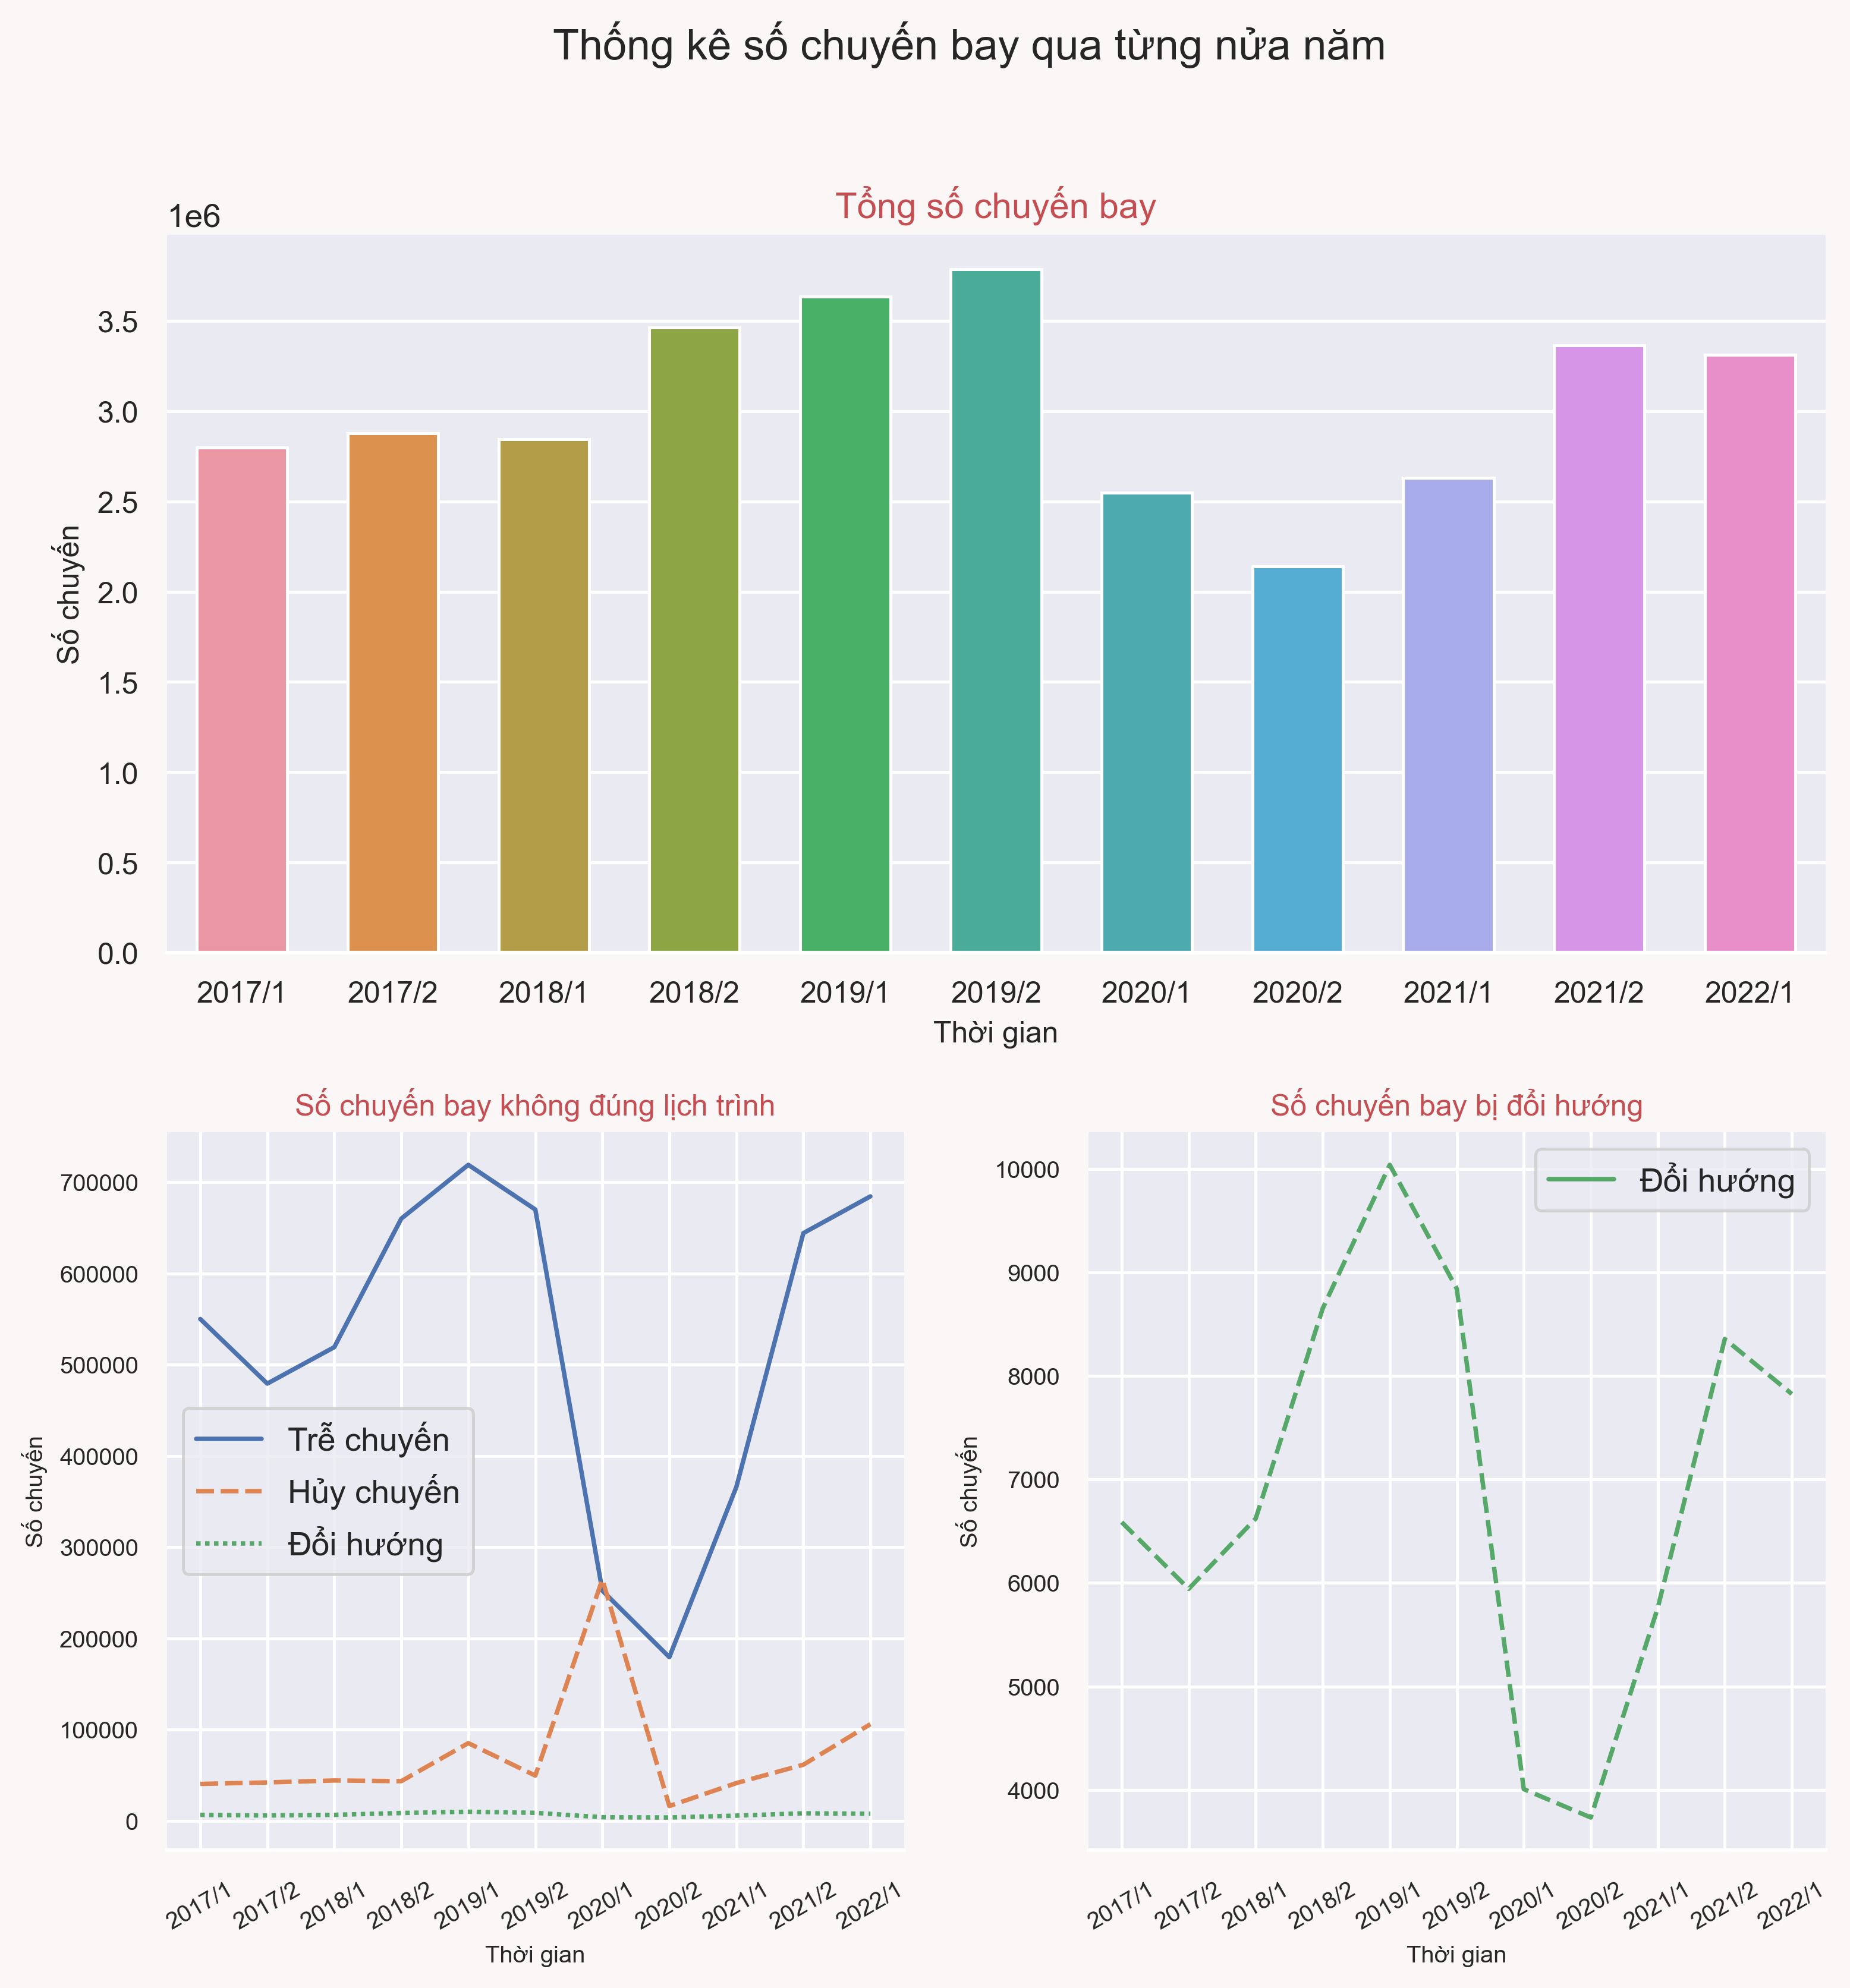

In [156]:
plt.rcParams['figure.dpi'] = 360
fig = plt.figure(figsize=(10, 10), facecolor='#fcf7f7')
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
fig.suptitle('Thống kê số chuyến bay qua từng nửa năm') 

# Create first axes, a combination of first and second cell
sub1 = fig.add_subplot(2,2,(1,2)) # two rows, two columns, fist cell
sub1 = sns.barplot(data = df0, x = 'year period', y = 'Tổng số chuyến', width=0.6)
sub1.set_xlabel('Thời gian', size=10)
sub1.set_ylabel('Số chuyến', size=10)
sub1.set_title('Tổng số chuyến bay', size=12, color = 'r')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Create second axes
sub2 = fig.add_subplot(2,2,3) # two rows, two columns, second cell
sub2 = sns.lineplot(data = df_delay_cancel)
sub2.set_title('Số chuyến bay không đúng lịch trình', size=10, color = 'r')
sub2.set_xlabel('Thời gian', size=8)
sub2.set_ylabel('Số chuyến', size=8)
plt.xticks(fontsize=8, rotation=30)
plt.yticks(fontsize=8)

# Create third axes
sub3 = fig.add_subplot(2,2,4) # two rows, two colums, combined third and fourth cell
sub3 = sns.lineplot(data = df_reverted, palette = ['g'])
sub3.lines[0].set_linestyle("--")
sub3.set_title('Số chuyến bay bị đổi hướng', size=10, color = 'r')
sub3.set_xlabel('Thời gian', size=8)
sub3.set_ylabel('Số chuyến', size=8)
plt.xticks(fontsize=8, rotation=30)
plt.yticks(fontsize=8)

sns.despine(left=True);

<h3 style=" background-color:#f7f2d5; font-family:sans-serif; line-height: 2em; font-size: 20px;">📝 Nhận xét 1: </h3>

Khi thống kê số lượng chuyến bay trong mỗi nửa năm:
- Từ nửa đầu 2018 về trước và nửa sau 2021 về sau, tổng số chuyến giữ mức ổn định.

- Số chuyến tăng liên tục từ nửa cuối 2018, và đạt giá trị cao nhất với 38 triệu chuyến/6 tháng cuối năm 2020. Đây là giai đoạn đường hàng không Mỹ phát triển nhất.

- Sau đó số chuyến giảm mạnh. Đây là thời điểm dịch Covid bắt đầu lan rộng, đường hàng không bị hạn chế do ảnh hưởng của dịch bệnh.
- Nửa sau 2021, số chuyến tăng lại và khá ổn định, tuy vậy số lượng vẫn thấp hơn so với ngay trước dịch bệnh.


<h3  style=" background-color:#f7f2d5; font-family:sans-serif; line-height: 2em; font-size: 20px;">📝 Nhận xét 2:</h3>

- Có thể nhận thấy xu hướng thay đổi tương đồng giữa tổng số chuyến với số chuyến bị trễ và đổi hướng.
- Ngược lại, nhìn chung, số lượng chuyến bay bị hủy không có sự biến đổi nhiều trước 2018, duy trì ở mức 50.000 chuyến/6 tháng. Chỉ có đặc biệt vào năm 2020, số chuyến bị hủy tăng gấp 5 lần, vượt trên cả giá trị Trễ chuyến.
- Sau khi hết dịch, số chuyến hủy trở lại giá trị như trước dịch, dù vậy nó đang có xu hướng tăng lên: đến nửa đầu 2022 gấp 2 lần giá trị trung bình được đo trước khi dịch covid bùng nổ. 
</br></br>
<div style = "line-height: normal; line-height: 1.7em;"> <b>
    => Giai đoạn nửa sau 2018 đến hết nửa sau 2019 là lúc đường hàng không phát triển nhất. </br>
=> Covid 19 ảnh hưởng nhiều đến hàng không, hiện tại tình hình dịch bệnh dần được kiểm soát, tình hình đường hàng không dần ổn định nhưng vẫn chưa hồi phục hoàn toàn như trước dịch. </br>
=> Đầu 2020 được xem là thời điểm dịch bệnh  ảnh hưởng nghiêm trọng nhất lên sự ổn định của loại hình giao thông này. </b>
</div>


<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 2</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Thời gian nào trong năm có tỉ lệ bị trễ chuyến cao? Lí do nào góp phần ảnh hưởng đến sự gia tăng này?
</div>
</br>
<div  style="font-family:sans-serif;">📍 Trả lời được sẽ dự đoán được khả năng bị hoãn chuyến theo các thời điểm trong năm và Dự đoán được các yếu tố ảnh hưởng tùy theo thời điểm đặt vé. Từ đó, hành khách sẽ chủ động hơn trong việc đặt vé, sắp xếp thời gian và cân nhắc các yếu tố ảnh hưởng, từ đó có sự chuẩn bị, dự phòng để có thể có lịch bay phù hợp.</div>


<div  style="font-family:sans-serif;">⚙ Xét theo từng tháng, tính tổng các giá trị: tổng số chuyến và số chuyến trễ. Sau đó tính tỉ lệ trễ vào các tháng trong năm, giá trị phần trăm làm tròn đến 1 chữ số sau dấu phẩy.</div>


In [157]:
df2 = df.copy()
df2 = df2[df2['year'] < 2022]
df2 = df2.groupby('month').sum().reset_index()
df2['tỉ lệ trễ'] = df2['arr_del15'] / df2['arr_flights'] * 100
df2['tỉ lệ trễ'] = df2['tỉ lệ trễ'].round(1)
df2

,month,year,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,tỉ lệ trễ
0,1,15164183,2497353.0,401806.0,118272.59,15755.16,135455.96,846.59,131476.60,49634.0,5553.0,26471794.0,8861014.0,1799039.0,6445785.0,40120.0,9325836.0,16.1
1,2,14477829,2249141.0,385234.0,110325.01,15164.48,133205.67,742.55,125797.16,50336.0,5306.0,25109130.0,8160850.0,1770373.0,6191941.0,40523.0,8945443.0,17.1
2,3,14803028,2687954.0,369933.0,115636.22,8612.12,117139.71,945.13,127599.25,148468.0,4196.0,22594982.0,8102855.0,897802.0,5093439.0,38977.0,8461889.0,13.8
3,4,14875331,2361813.0,348613.0,105240.33,10690.93,109946.52,877.46,121857.70,159175.0,4527.0,23565427.0,7785195.0,1262002.0,5572137.0,53861.0,8892232.0,14.8
4,5,14269815,2276427.0,390330.0,115813.64,13289.92,122215.31,888.55,138122.55,35479.0,5913.0,25852384.0,8039920.0,1417609.0,6429189.0,36902.0,9928764.0,17.1
5,6,14427148,2381422.0,511079.0,152976.11,21924.49,145686.67,1336.78,189155.13,33236.0,7522.0,35291616.0,11010282.0,2080423.0,7867393.0,72190.0,14261328.0,21.5
6,7,14564622,2605835.0,531702.0,164447.29,24974.33,146530.18,1422.03,194328.55,38070.0,8517.0,37584838.0,12107317.0,2378688.0,8086295.0,69239.0,14943299.0,20.4
7,8,15345613,2703728.0,524475.0,158106.23,23031.13,154272.19,1259.01,187804.94,53912.0,7847.0,35745158.0,11480459.0,2156657.0,8249799.0,56937.0,13800603.0,19.4
8,9,15616181,2511853.0,331002.0,105614.83,11389.25,106252.49,945.05,106801.47,42036.0,4789.0,21015331.0,7355033.0,1110893.0,5097242.0,50381.0,7401782.0,13.2
9,10,15585858,2648806.0,404823.0,129101.89,10316.01,125963.29,1030.19,138412.37,26584.0,4811.0,24908709.0,8986057.0,1036302.0,5560924.0,45934.0,9279492.0,15.3


<div  style="font-family:sans-serif;">⚙ Trực quan hóa bằng biểu đồ cột.</div>


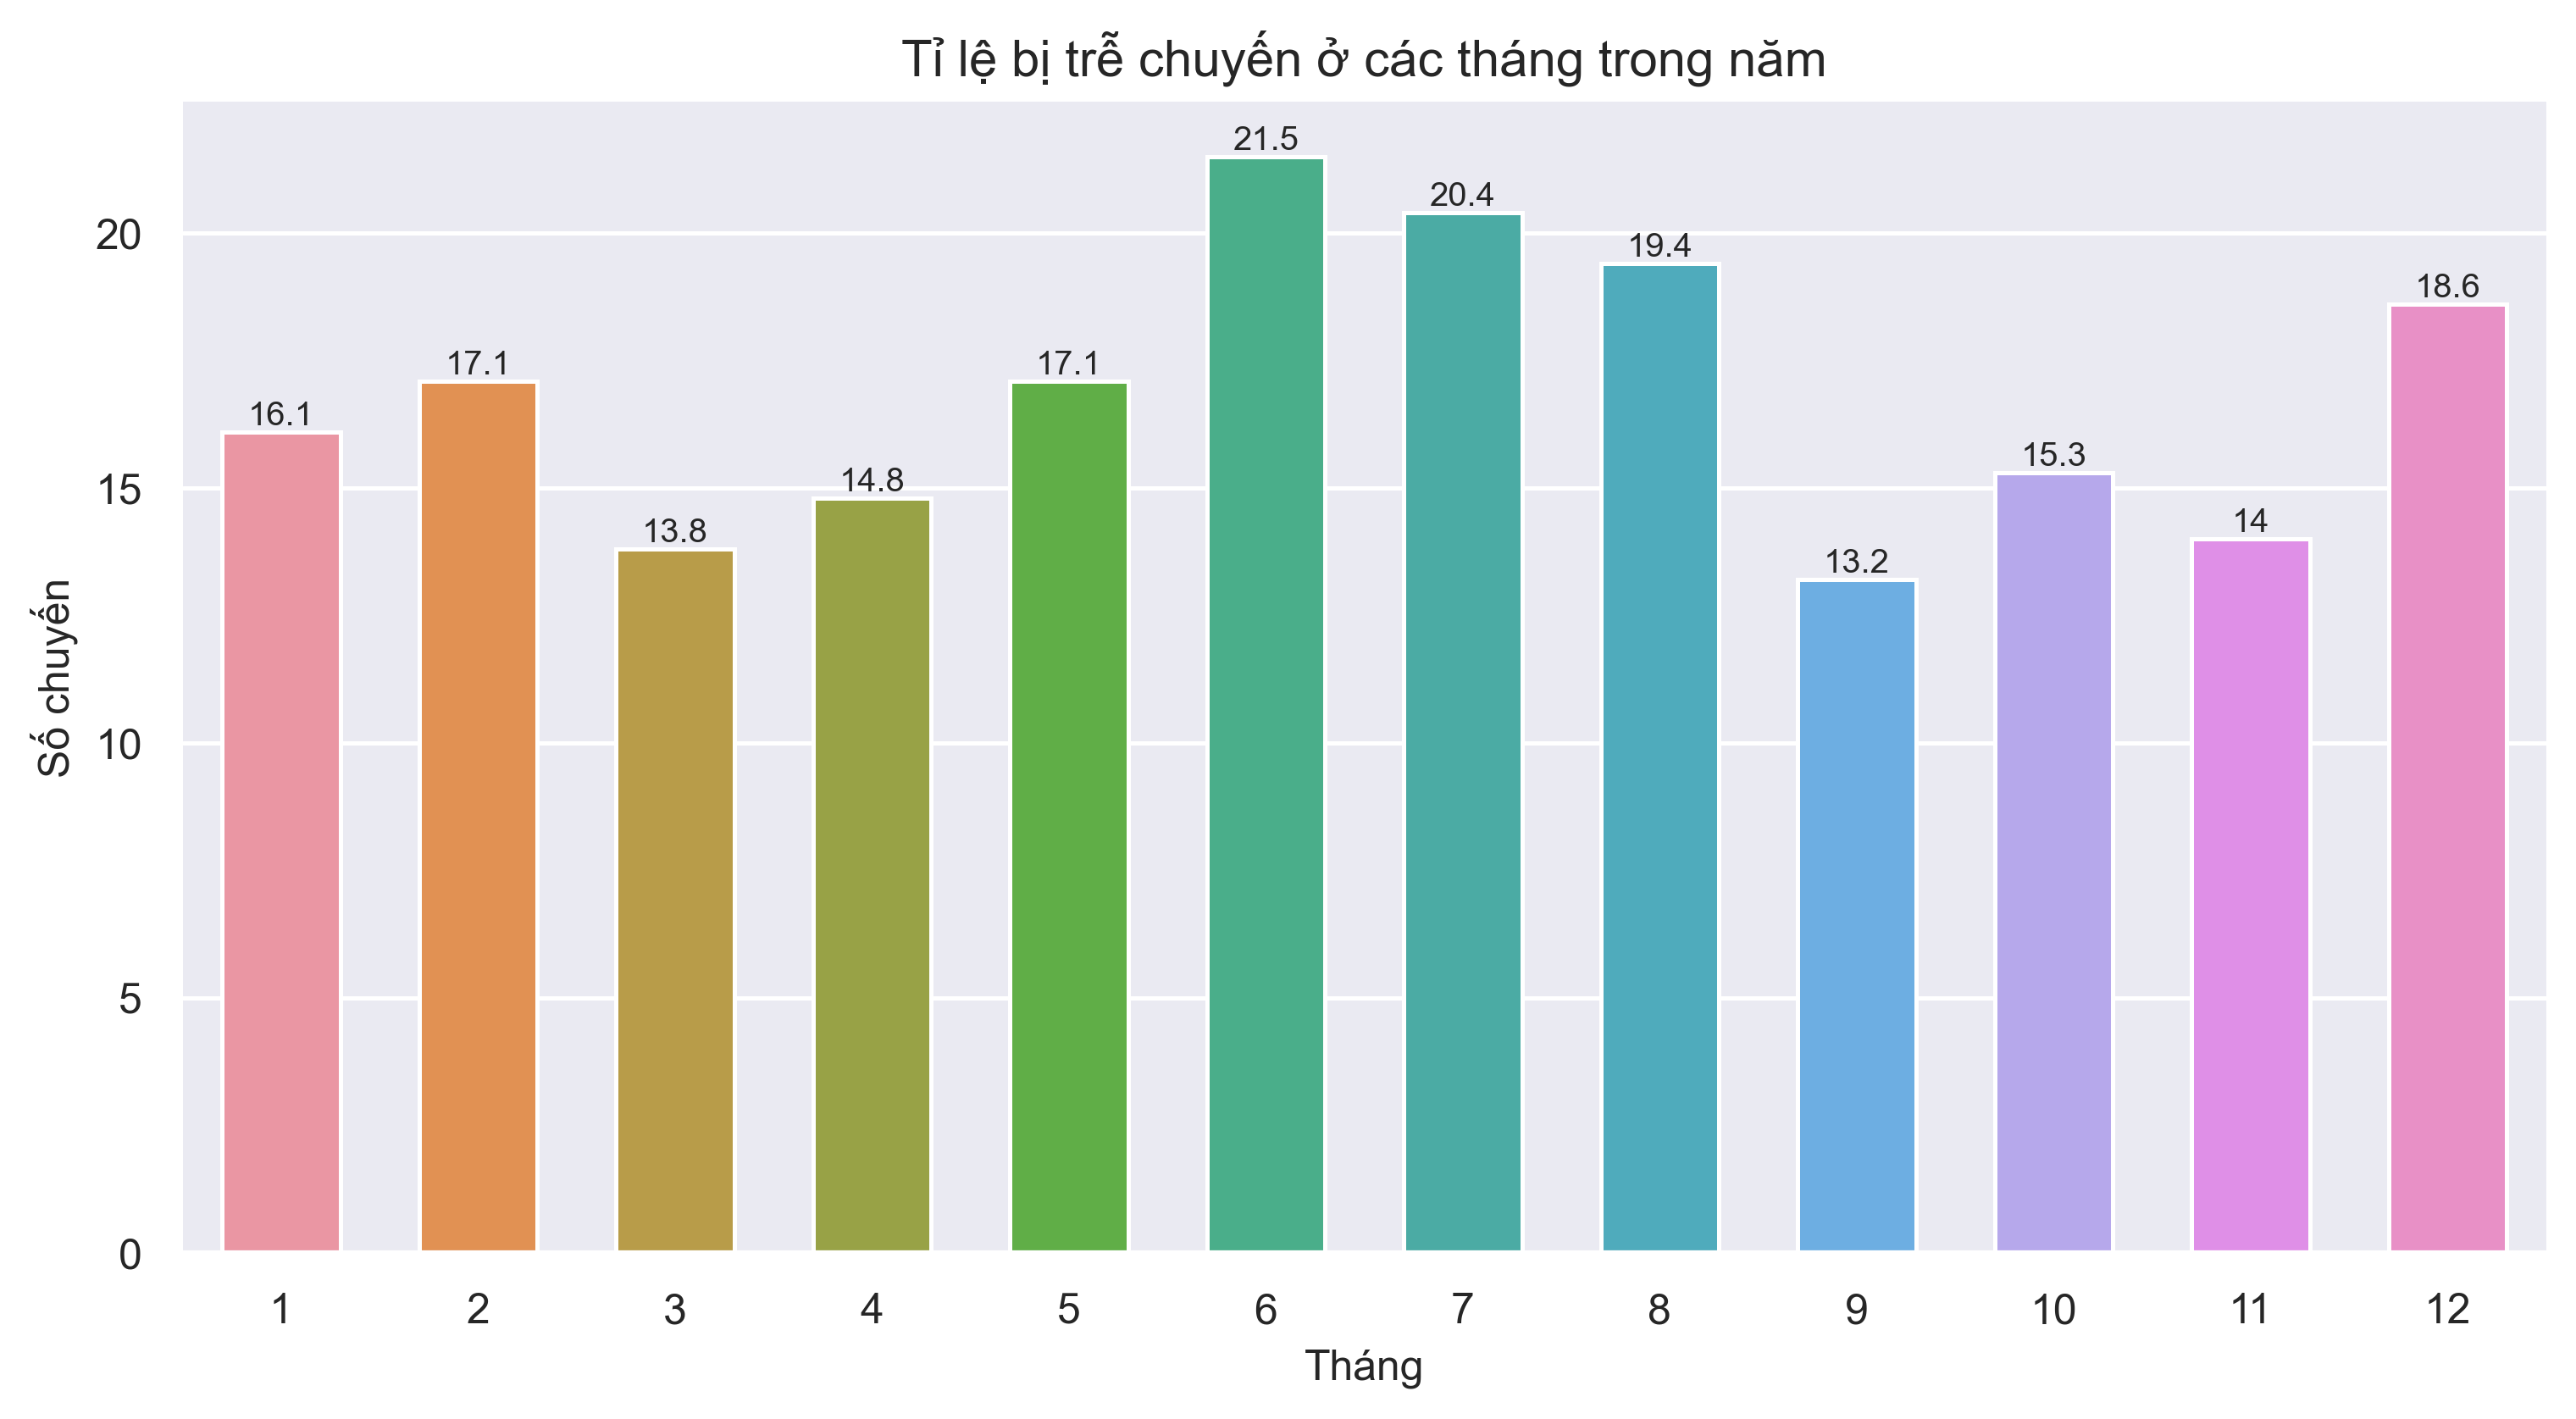

In [158]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
ax1 =  sns.barplot(data = df2, x = 'month', y = 'tỉ lệ trễ', width=0.6)
ax1.bar_label(ax1.containers[0], size = 8)
plt.xlabel('Tháng', size=10)
plt.ylabel('Số chuyến', size=10)
plt.title('Tỉ lệ bị trễ chuyến ở các tháng trong năm', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3 style=" background-color:#f7f2d5; font-family:sans-serif; line-height: 2em; font-size: 20px;">📝 Nhận xét:</h3>

- Tần suất trễ chuyến:

    + cao nhất tháng 6: cứ 1000 chuyến thì có 215 chuyến bị hoãn (chiếm hơn 1/5).
    + thấp nhất tháng 9: cứ 1000 chuyến thì có 132 chuyến bị hoãn.
    
- Tỉ lệ bị trễ chuyến tăng cao vào 2 giai đoạn: tháng (12, 1, 2) và đặc biệt là tháng (6, 7, 8); rơi vào nghỉ đông, và kì nghỉ hè. Khả năng bị trễ cao hơn có thể do đây là thời điểm nhu cầu du lịch, di chuyển tăng.

- Dựa trên giá trị của mỗi tháng, có thể chia làm 4 giai đoạn (trong bài sẽ gọi là 4 quý), cũng khá tương đồng với 4 mùa trong năm, đó là Quý I (tháng 12,1,2), Quý II (3,4,5), Quý III (6,7,8), Quý IV (9,10,11).

In [159]:
def quarter(month):
    if month in (12,1,2):
        return 'I'
    if month in (3,4,5):
        return 'II'
    if month in (6,7,8):
        return 'III'
    if month in (9,10,11):
        return 'IV'
    

df_reason = df2[['month','arr_del15','carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

df_reason['quarter'] = df_reason['month'].apply(quarter)
df_reason = df_reason.groupby('quarter').sum().reset_index()
display(df_reason)
df_reason['hãng bay'] = (df_reason['carrier_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['thời tiết'] = (df_reason['weather_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['hệ thống hàng không'] = (df_reason['nas_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['an ninh'] = (df_reason['security_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['trễ tàu bay'] = (df_reason['late_aircraft_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason2 = df_reason.iloc[:,-5:]
print('Bảng tỉ lệ ảnh hưởng của các nguyên nhân qua từng quý')
display(df_reason2)

,quarter,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,I,15,1270651.0,388169.26,45540.05,410096.62,3050.90,423796.52
1,II,12,1108876.0,336690.19,32592.97,349301.54,2711.14,387579.50
2,III,21,1567256.0,475529.63,69929.95,446489.04,4017.82,571288.62
3,IV,30,1093628.0,352919.26,29649.35,342725.53,3179.49,365156.55


Bảng tỉ lệ ảnh hưởng của các nguyên nhân qua từng quý


,hãng bay,thời tiết,hệ thống hàng không,an ninh,trễ tàu bay
0,30.55,3.58,32.27,0.24,33.35
1,30.36,2.94,31.50,0.24,34.95
2,30.34,4.46,28.49,0.26,36.45
3,32.27,2.71,31.34,0.29,33.39


<div  style="font-family:sans-serif;">⚙ Vẽ 4 biểu đồ tròn ứng với 4 quý (I, II, III, IV), thể hiện phần trăm ảnh hưởng của 5 yếu tố lên việc hoãn chuyến.</div>


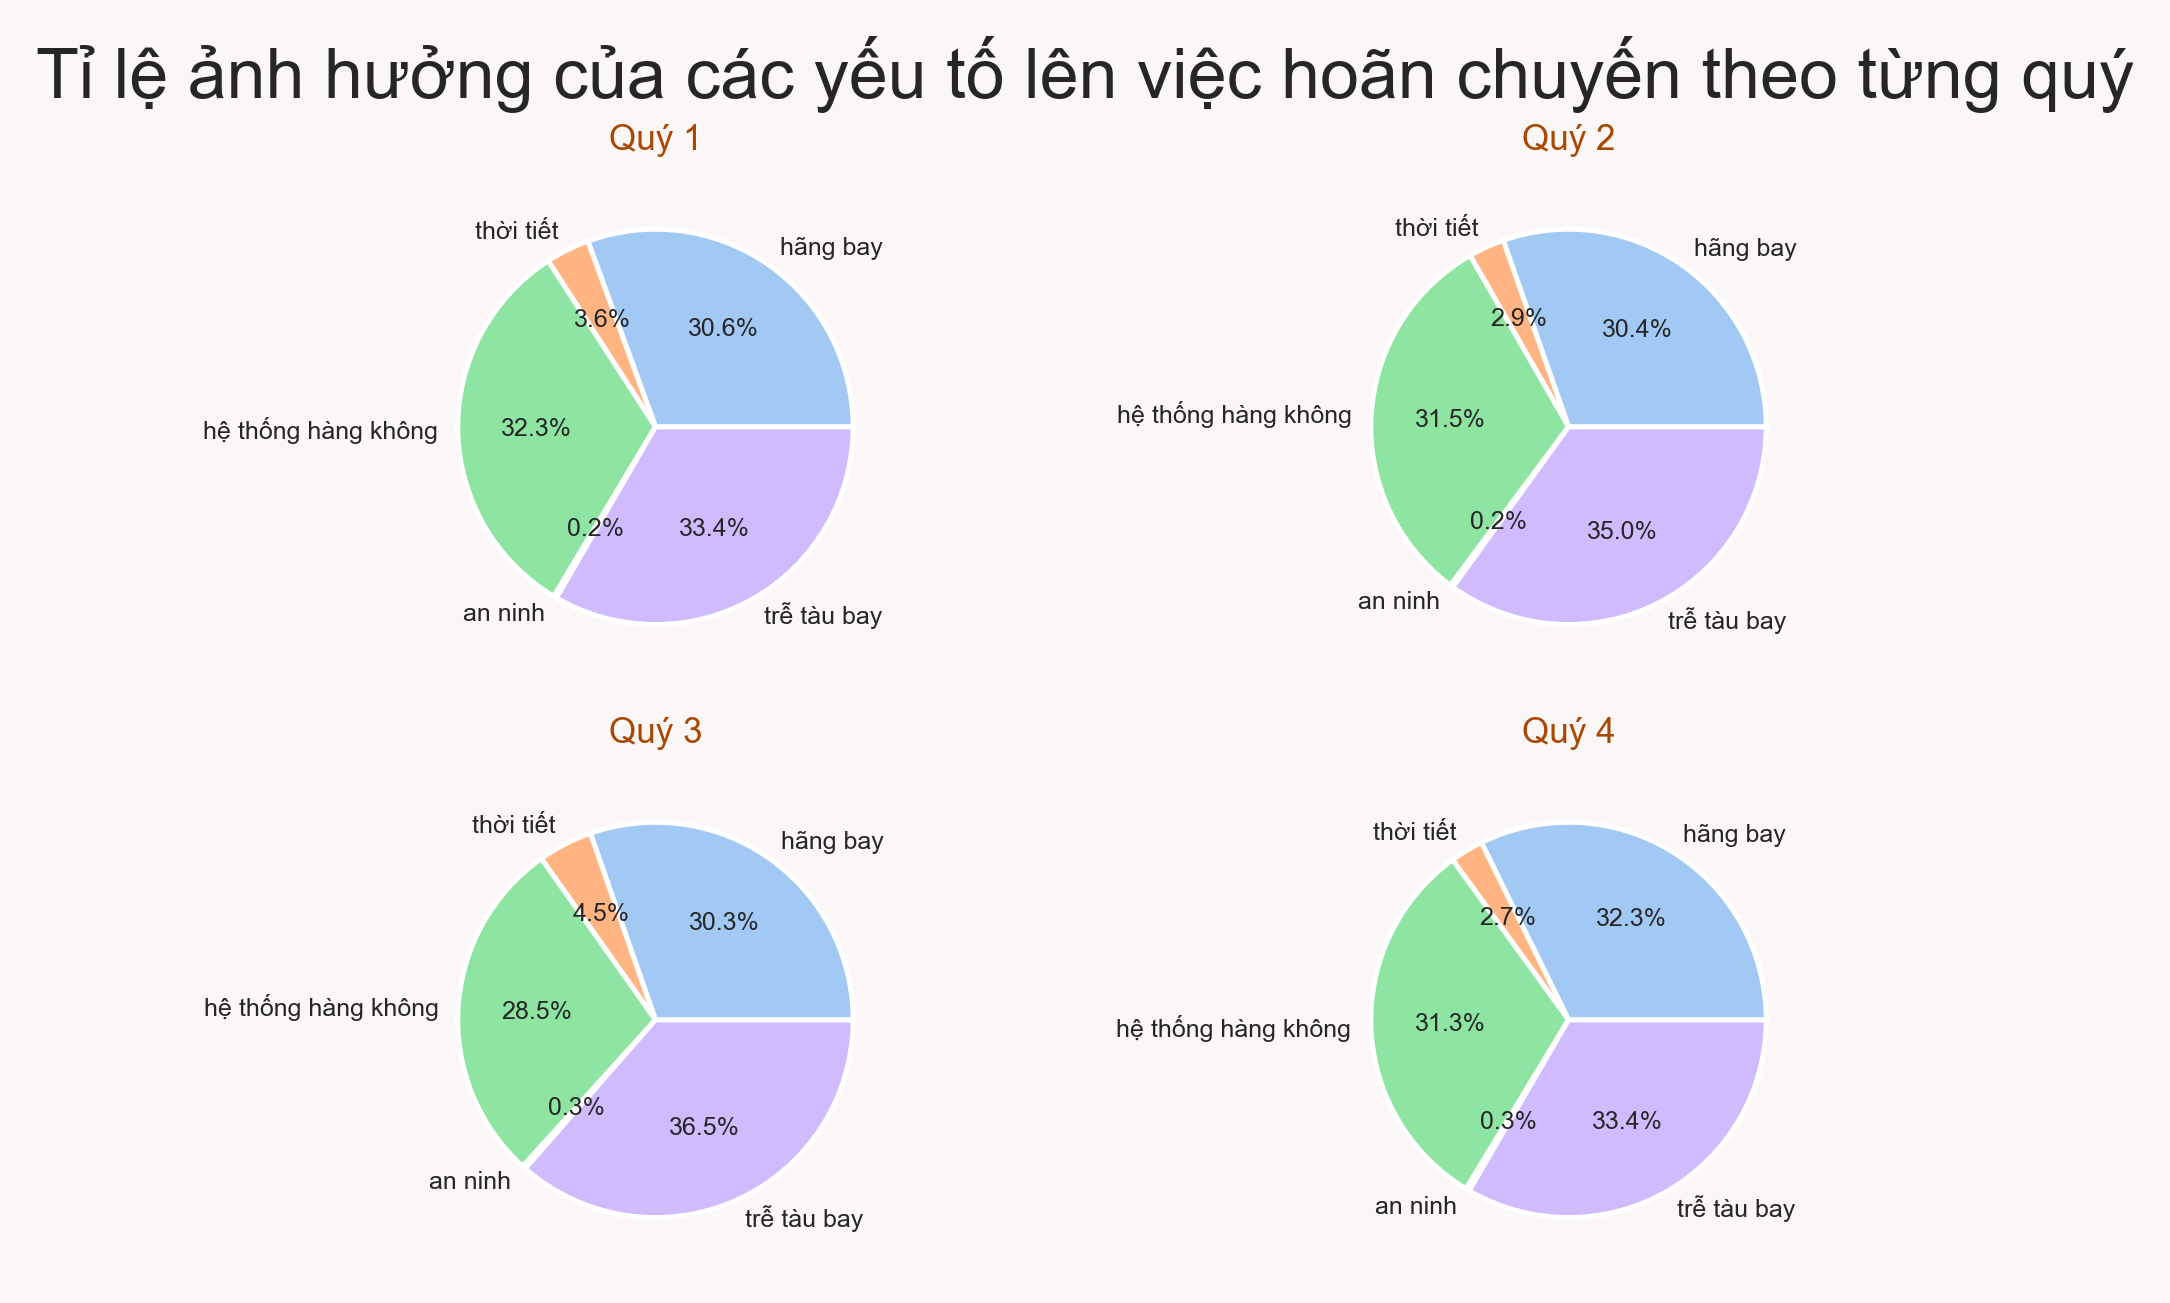

In [160]:
plt.rcParams['figure.dpi'] = 360
fig,axes = plt.subplots(2,2, facecolor='#fcf7f7')
fig.suptitle('Tỉ lệ ảnh hưởng của các yếu tố lên việc hoãn chuyến theo từng quý', size = 14)
palette_color = sns.color_palette('pastel')
# declaring data
data = df_reason2.loc[0]
keys = df_reason2.columns
axes[0][0].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[0][0].set_title('Quý 1', size=7, color = '#a84803')

# declaring data
data = df_reason2.loc[1]
keys = df_reason2.columns
axes[0,1].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[0,1].set_title('Quý 2', size=7, color = '#a84803')

# declaring data
data = df_reason2.loc[2]
keys = df_reason2.columns
axes[1,0].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[1,0].set_title('Quý 3', size=7, color = '#a84803')

# declaring data
data = df_reason2.loc[3]
keys = df_reason2.columns
axes[1,1].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[1,1].set_title('Quý 4', size=7, color = '#a84803')

plt.show()

<h3 style=" background-color:#f7f2d5; font-family:sans-serif; line-height: 2em; font-size: 20px;">📝 Nhận xét:</h3>

- Qua các quý, ta thấy sự tương đồng tỉ lệ trong các yếu tố: hãng bay (khoảng 32%); an ninh (0.3%).
- Vào quý 3 (thời gian bị delay cao nhất trong năm), tỉ lệ 2 yếu tố Thời tiết và Trễ tàu bay cao hơn cả. Có thể thấy lí do quý 3 bị delay nhiều là phần lớn là do 2 yếu tố này, do là vào thời điểm này thời tiết có sự bất ổn, có nhiểu cơn bão mùa hè, và việc số lượng chuyến bay tăng vào kì nghỉ hè ảnh hưởng đến việc tàu bay bị trễ.

<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 3</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Đâu là các sân bay thuộc top lớn nhất? Trung bình thời gian chờ ở các sân bay này là bao lâu?
</div>
</br>
<div  style="font-family:sans-serif;">📍 Trả lời được thì các nhãn hàng có thể có kế hoạch đầu tư quảng cáo ở đây; ngoài ra tạo điều kiện để hành khách chủ động hơn trong việc đặt vé và sắp xếp thời gian. </div>


📝 Để trả lời câu hỏi này, ta cần:
- Bước 0: Tạo thêm cột tính thời gian trễ trung bình mỗi chuyến.
- Bước 1: Tìm ra top 10 sân bay có số chuyến khởi hành cao nhất.
- Bước 2: Vẽ box plot cho thời gian chờ của mỗi sân bay vừa tìm.

<h4>Code bước 0, 1</h4>

<div  style="font-family:sans-serif;">⚙ Theo từng dòng dữ liệu, thêm cột <b>Mean Delay Time</b>. Giá trị cột này là thời gian chờ trung bình của mỗi chuyến (cách tính: arr_delay / arr_del15). Đây là thống kê theo từng tháng của từng hãng bay xuất phảt ở các sân bay khác nhau.</div> 
 <div  style="font-family:sans-serif;">
    Tiếp theo ta tìm top 10 sân bay lớn. Tính tổng số chuyến khởi hành của mỗi sân bay, lưu vào df31. Sau đó lấy ra 2 cột mã và tên sân bay để hiển thị thông tin.</div>

In [161]:
df3 = df.copy()
df3['Mean Delay Time'] = (df3['arr_delay'] / df3['arr_del15'])

# tìm top 10 
df31 = df3[['airport', 'airport_name', 'arr_flights']].groupby(['airport', 'airport_name']).sum()
df31 = df31.sort_values(by = ['arr_flights'], ascending=False).reset_index()
df31 = df31[['airport', 'airport_name']]
display(df31.head(10))
print('Top 10 sân bay lớn nhất ở Mỹ nằm ở các thành phố: Atlanta, Chicago, Dallas, Denver, LA, Chalotte, Phoenix, Seattle, San Francissco')

,airport,airport_name
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
1,ORD,"Chicago, IL: Chicago O'Hare International"
2,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
3,DEN,"Denver, CO: Denver International"
4,LAX,"Los Angeles, CA: Los Angeles International"
5,CLT,"Charlotte, NC: Charlotte Douglas International"
6,PHX,"Phoenix, AZ: Phoenix Sky Harbor International"
7,LAS,"Las Vegas, NV: McCarran International"
8,SEA,"Seattle, WA: Seattle/Tacoma International"
9,SFO,"San Francisco, CA: San Francisco International"


Top 10 sân bay lớn nhất ở Mỹ nằm ở các thành phố: Atlanta, Chicago, Dallas, Denver, LA, Chalotte, Phoenix, Seattle, San Francissco


<div  style="font-family:sans-serif;">⚙ Lưu top 10 sân bay (lưu mã sân bay) vào top_airport. Sau đó tạo dataframe <b>df_top_airport</b> chứa số liệu thời gian chờ ở mỗi sân bay.</div>


In [162]:
top_airport = df31.head(10)['airport']
data_ = dict()
for airport in top_airport:
    data = df3[df3['airport'] == airport].reset_index()['Mean Delay Time']
    data_.update({airport: data})

df_top_airport = pd.DataFrame({ key:pd.Series(value) for key, value in data_.items()})

<h4>Code bước 2</h4>

<div  style="font-family:sans-serif;">⚙ Trực quan hóa dữ liệu thời gian chờ vừa thống kê bằng box plots, sắp xếp tăng dần theo median. Nhận thấy có outlier, các giá trị này đều nằm ở trên giá trị max của mỗi đơn vị. Khi vẽ biểu đồ ta loại bỏ những điểm outlier để dễ trực quan hơn.</div>


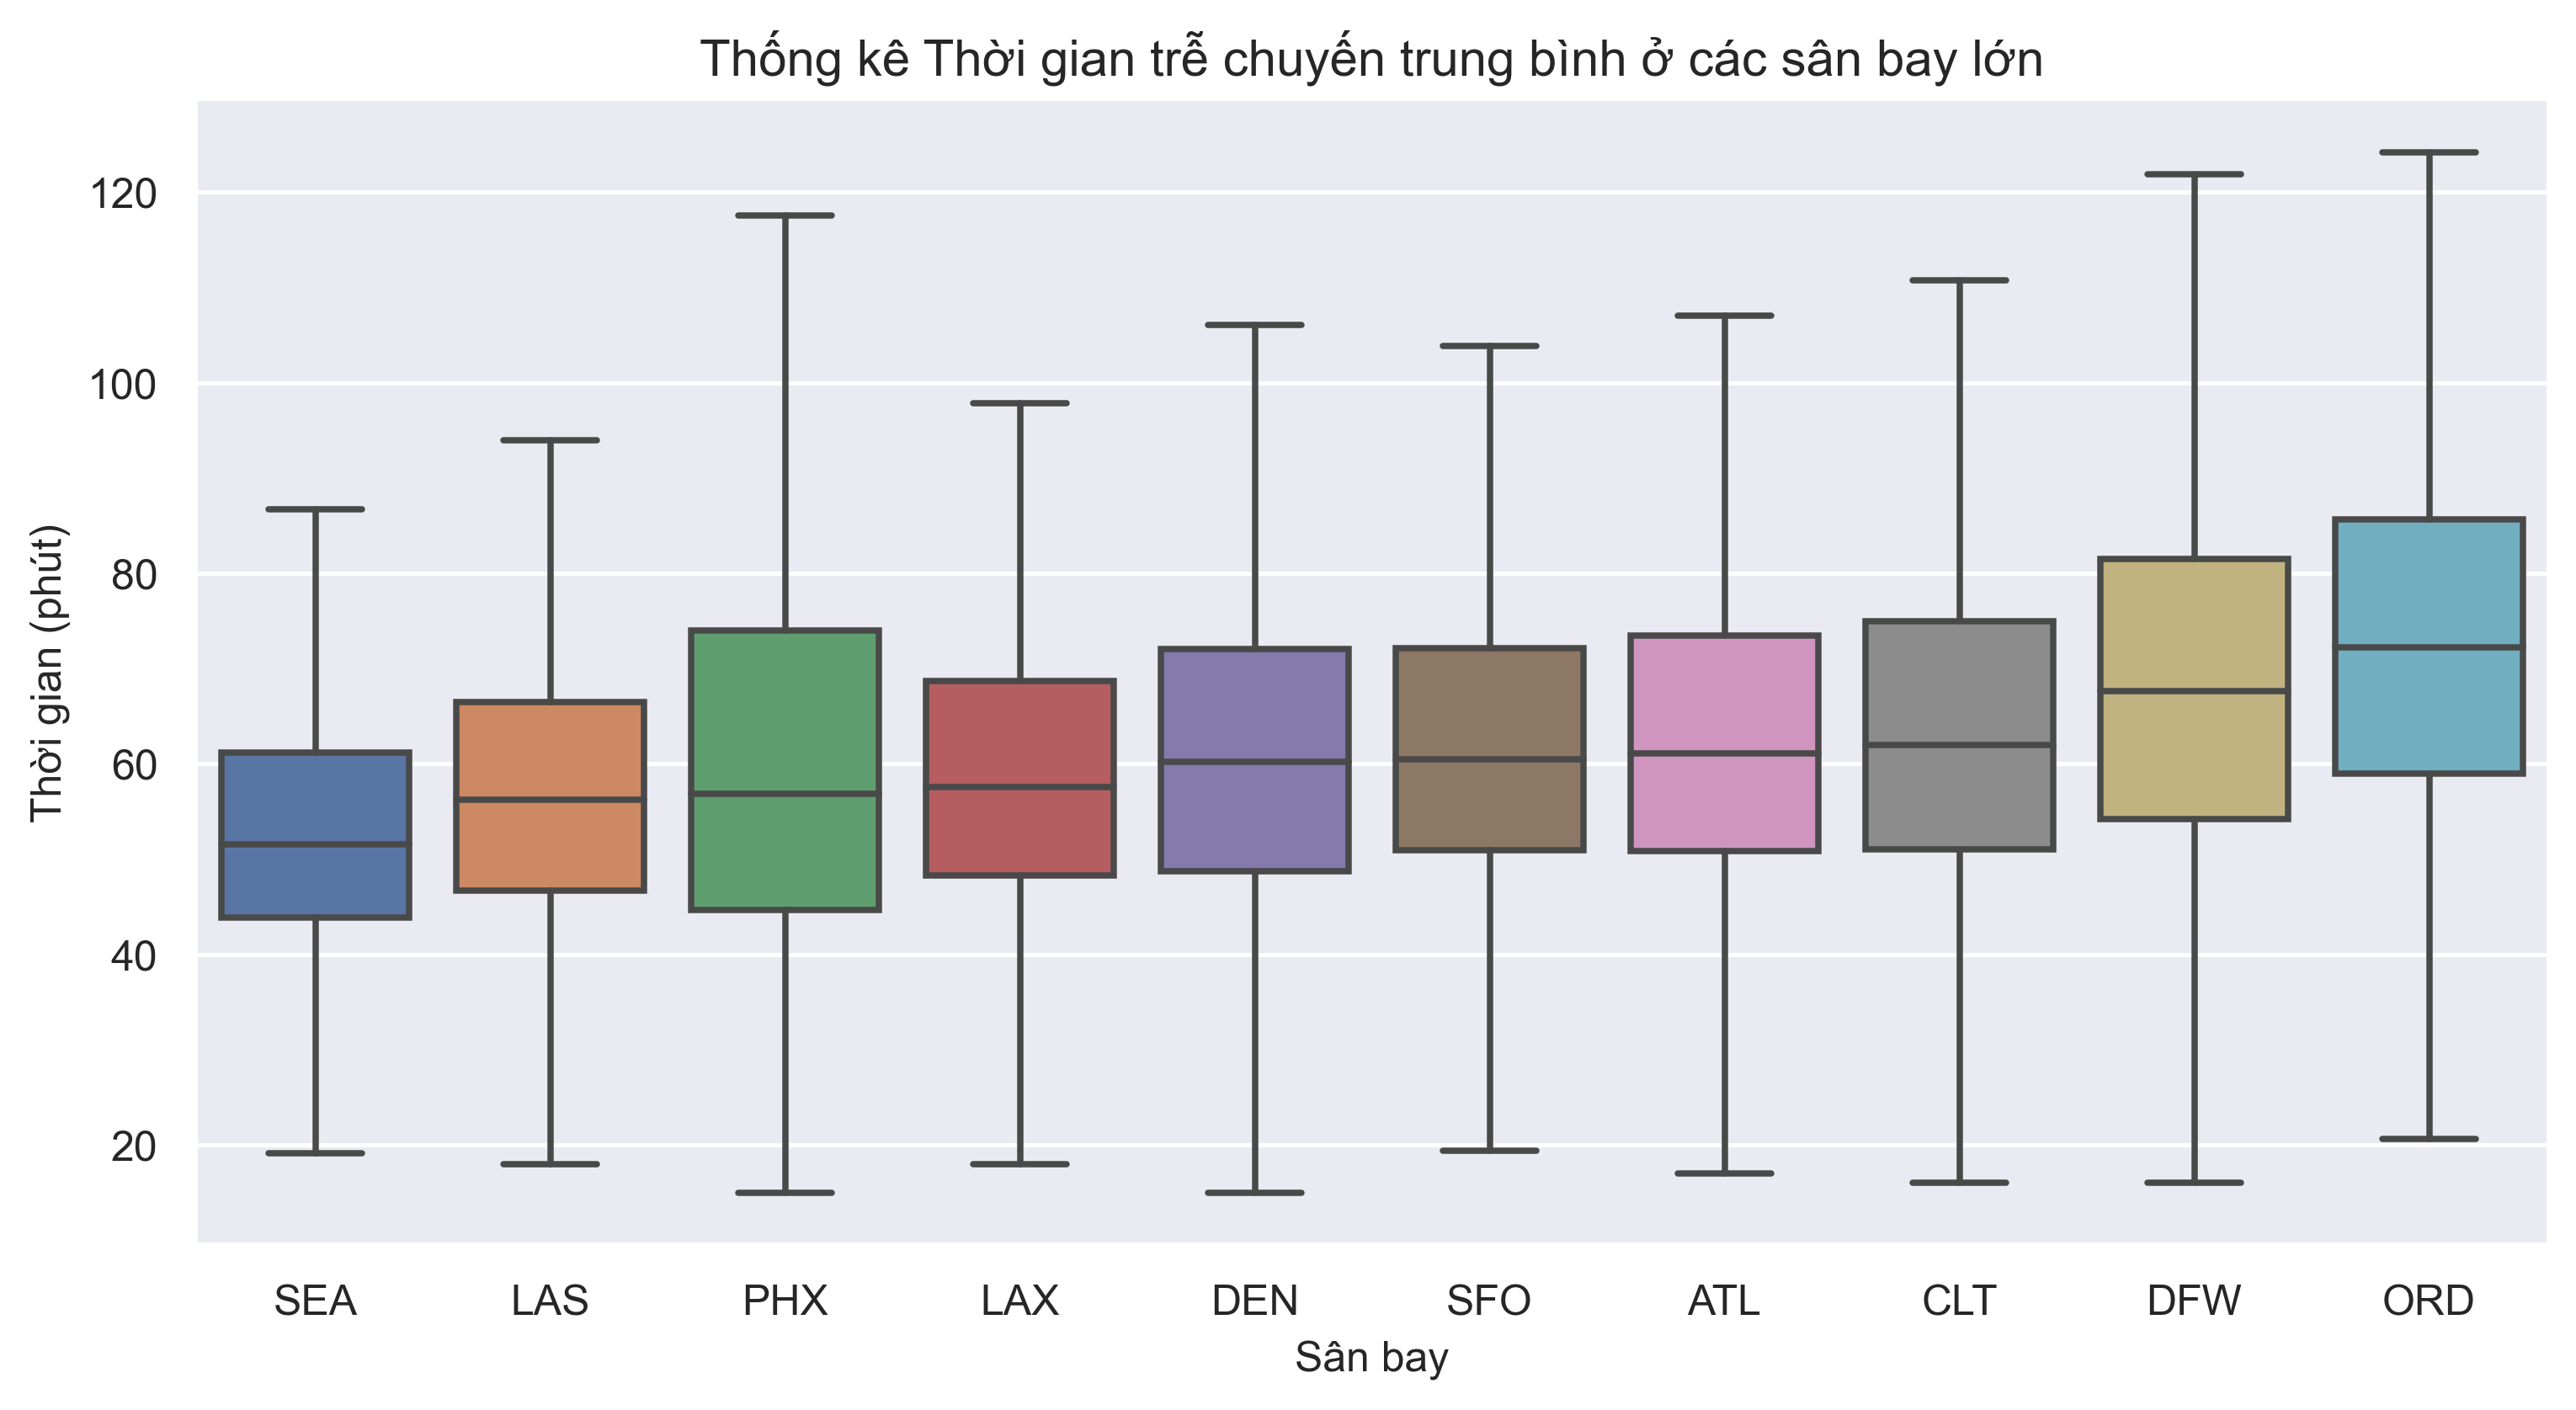

In [163]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))

index_sort = df_top_airport.median().sort_values().index
df_sorted = df_top_airport[index_sort]
sns.boxplot(data=df_sorted, showfliers = False)
plt.xlabel('Sân bay', size=10)
plt.ylabel('Thời gian (phút)', size=10)
plt.title('Thống kê Thời gian trễ chuyến trung bình ở các sân bay lớn', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3 style=" background-color:#f7f2d5; font-family:sans-serif; line-height: 2em; font-size: 20px;">📝 Nhận xét:</h3>

- Top 10 sân bay lớn ở Mỹ có trung bình thời gian chờ mỗi tuyến giao động từ 50-70 phút/chuyến.

- ATL là sân bay có nhiều chuyến nhất nhưng thời gian chờ tại sân bay ORD lại cao nhất.

- Chuyến bay bị hoãn lâu nhất là ở sân bay ORD (125 phút), thấp nhất ở DEN (10 phút).

- Thời gian chờ thấp nhất ở mỗi sân bay tương đối bằng nhau: khoảng 10-20 phút/chuyến.

- Thời gian trễ chuyến ở PHX, DFW và ORD đa dạng nhất. Ngược lại, sân bay SEA dễ dự đoán thời gian bị trễ nhất trong top 10 sân bay lớn.

<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 4</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Nguyên nhân nào chiếm phần lớn trong việc gây trễ chuyến bay? Qua các năm số lượng chuyến bay bị ảnh hưởng bởi các nguyên nhân này có giảm không?
</div>
</br>
<div  style="font-family:sans-serif;">📍 Trả lời được thì các hãng bay/sân bay có thể phân bổ đầu tư nhiều hơn để cải thiện. Ngoài ra, nếu dự đoán được các lý do trễ có thể xảy ra, hãng bay có thể sắp xếp/chuyển đổi lịch bay phù hợp để hạn chế ảnh hưởng đên hành khách, hoặc thông báo trước với khách hàng về khả năng thay đổi lịch trình trước. Nhờ đó hành khách cũng linh động hơn trong việc đặt vé, hủy vé, và có cái nhìn thiện cảm ơn với hãng bay, sân bay.</div>


📝 Để trả lời câu hỏi này, ta cần:
- Bước 1: Tính số lượng các chuyến bay bị trễ do các nguyên nhân khác nhau theo từng năm, lưu vào data_delay trong đó index là year.
- Bước 2: Từ kết quả trên vẽ biểu đồ pie để xem mỗi năm thì những nguyên nhân nào chiếm phần lớn gây nên việc trễ chuyến bay.

### Tiền xử lý và phân tích dữ liệu để trả lời câu hỏi
</br>
<div  style="font-family:sans-serif;">⚙ Code bước 1:</div>


In [164]:
# data_delay=df.loc[df['year']!=2022]
data_delay = df.groupby('year')[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].sum()
data_delay = data_delay.rename(columns = {'carrier_ct' : 'Hãng bay', 'weather_ct' : 'Thời tiết', 'nas_ct': 'Hệ thống HK','security_ct': 'An ninh', 'late_aircraft_ct': 'Trễ tàu bay'})
data_delay

,Hãng bay,Thời tiết,Hệ thống HK,An ninh,Trễ tàu bay
year,,,,,
2017,285058.62,28580.50,330589.89,1801.53,383442.51
2018,329525.62,38951.90,387162.95,2270.54,421521.01
2019,387853.40,46302.53,439490.62,2642.27,512965.20
2020,156852.77,19647.38,144325.07,1543.31,109553.33
2021,394017.93,44230.01,247044.20,4701.70,320339.14
2022,313797.29,29379.05,194779.23,2566.91,282139.02


Code bước 2:

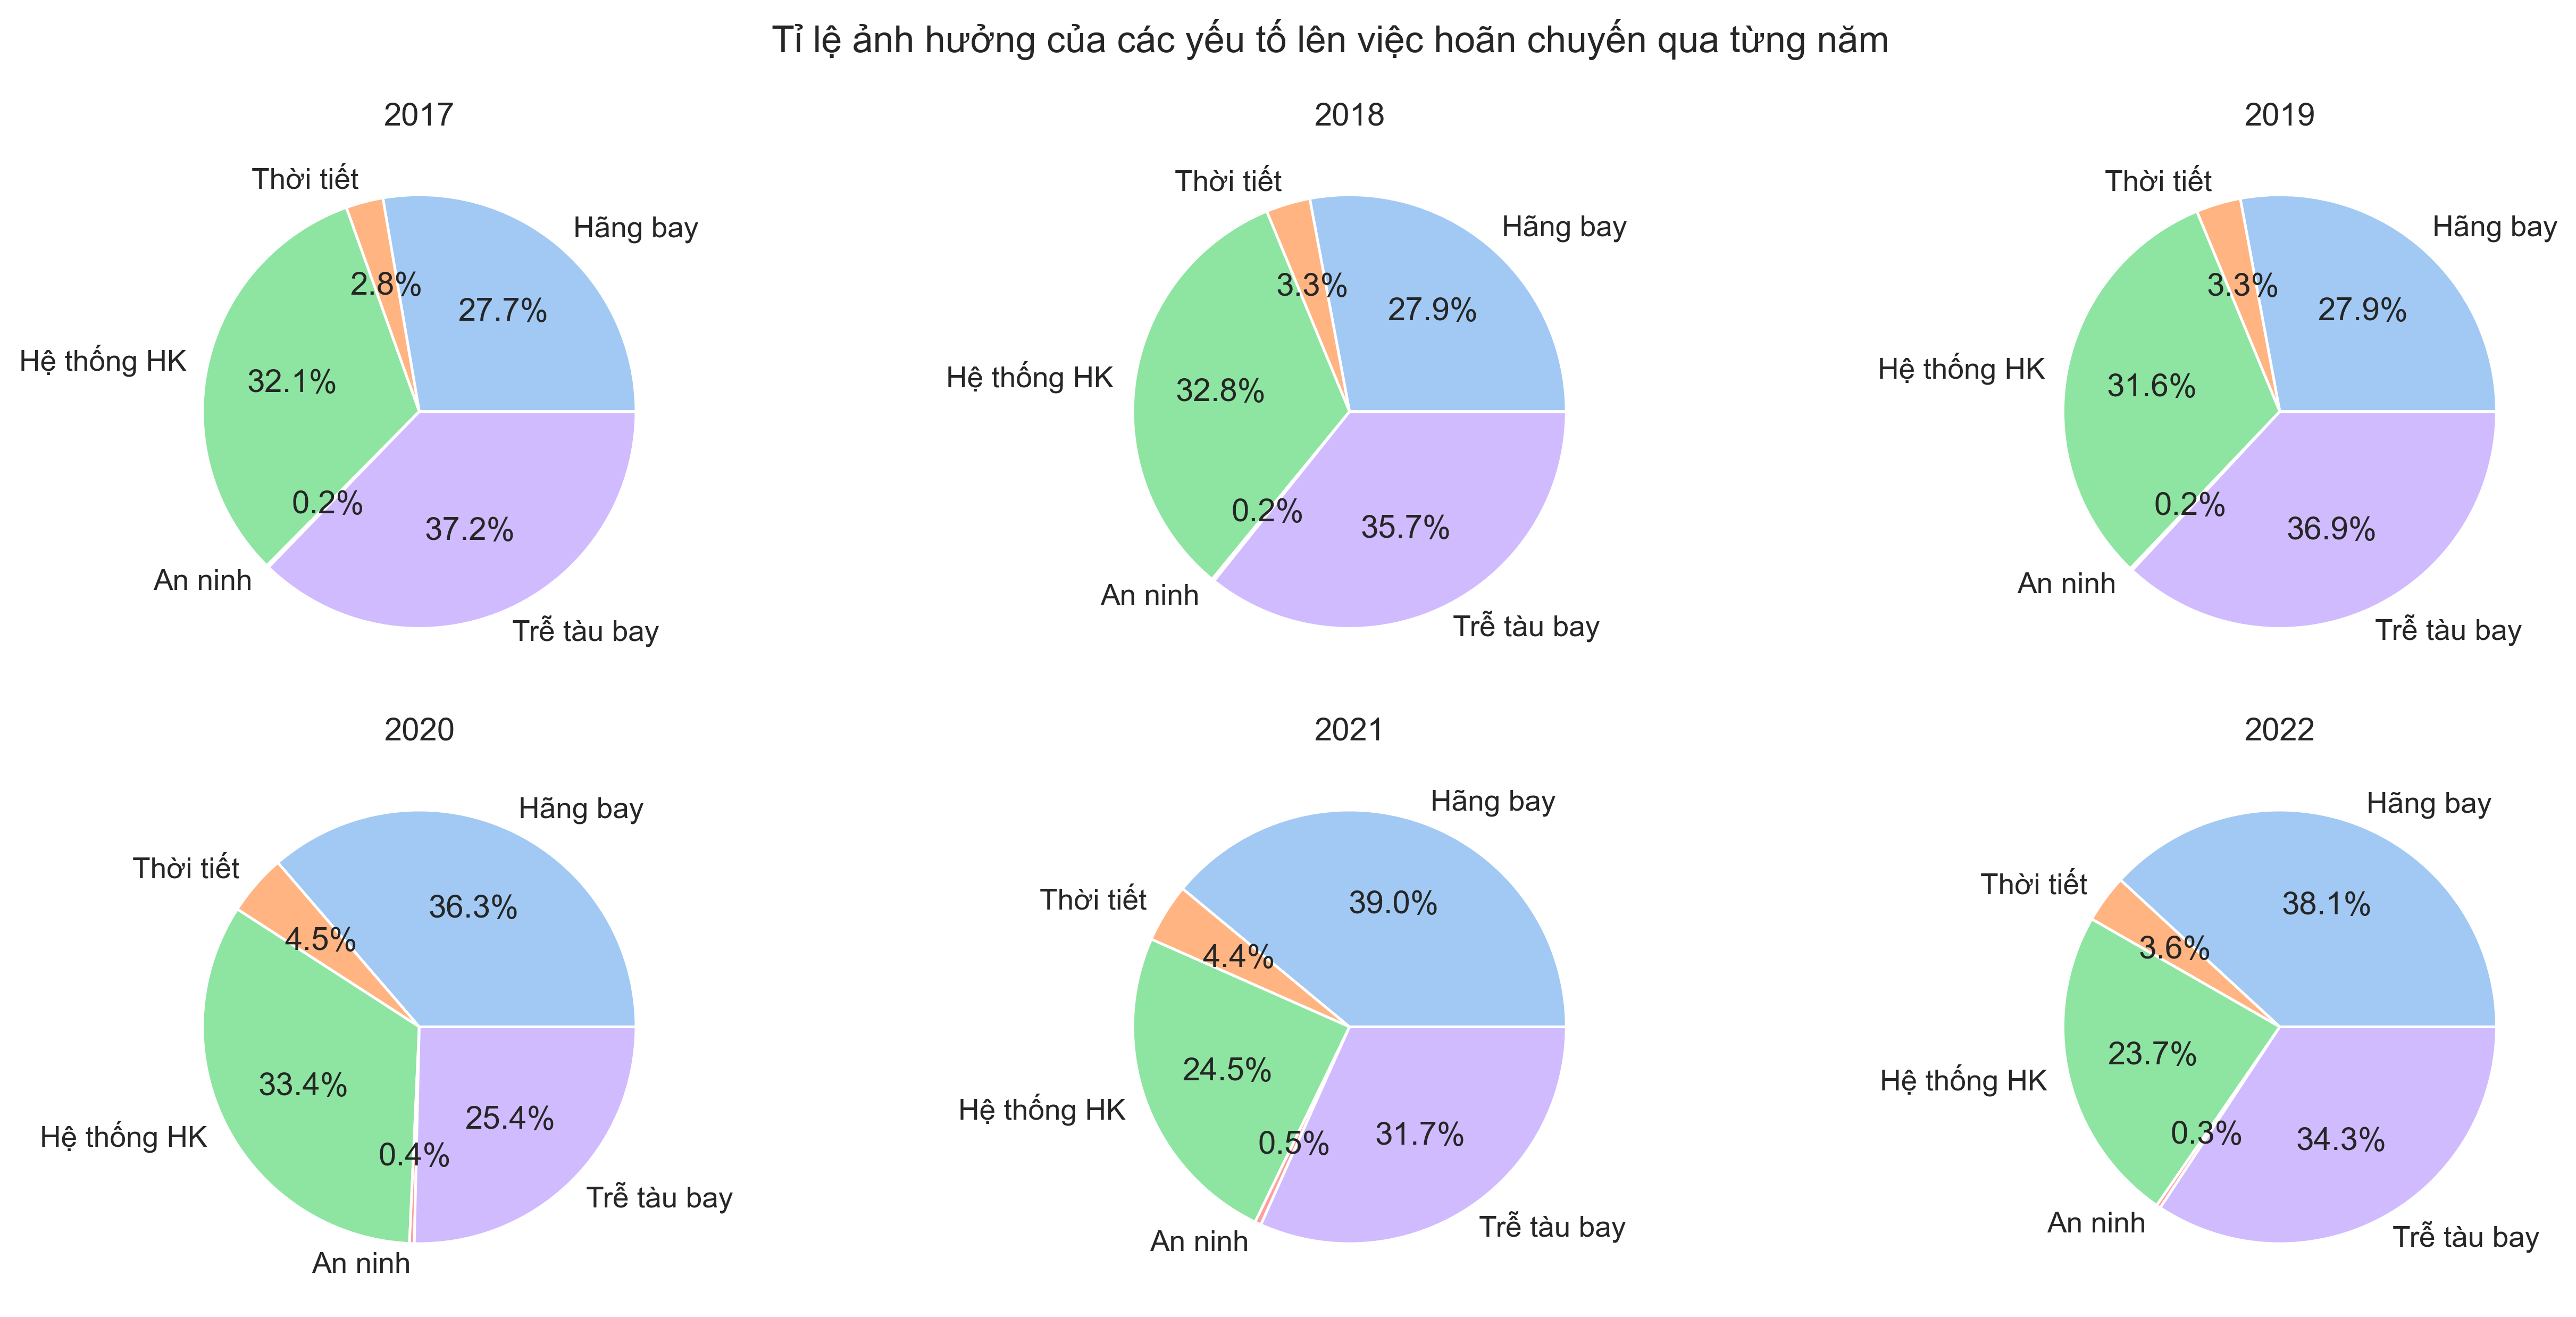

In [165]:
plt.rcParams['figure.dpi'] = 360
colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(2,3, figsize=(5,10))
fig.suptitle('Tỉ lệ ảnh hưởng của các yếu tố lên việc hoãn chuyến qua từng năm', size = 14)
fig.set_figwidth(15)
fig.set_figheight(7)
idx = 0
for i in range(2):
    for j in range(3):
        ax[i,j].pie(data_delay.iloc[idx],labels = data_delay.iloc[idx].index,colors = colors, autopct='%.1f%%')
        ax[i,j].set_title(data_delay.index[idx])
        idx+=1
plt.tight_layout()

plt.show()

📝 Quan sát các biểu đồ trên, ta nhận thấy rằng 3 nguyên nhân chủ yếu khiến cho các chuyến bay bị trễ là:
- carrier_ct: Số chuyến bay bị hoãn vì hãng hàng không.
- nas_ct: Số chuyến bay bị hoãn vì hệ thống hàng không quốc gia.
- late_aircraft_ct: Số chuyến bay bị hoãn do trễ tàu bay.

📝 Tiếp theo, để tìm hiều rõ hơn, ta sẽ xem xét số lượng các chuyến bay bị trễ biến động như thế nào qua các năm bởi ba nguyên nhân chủ yếu trên.
Để làm rõ ta cần: 
- Bước 1: Ta lọc ra số lượng các chuyến bay bị trễ bởi 3 nguyên nhân(hãng hàng không, hệ thống hàng không quốc gia, một chuyến khác trên cùng máy bay cũng bị hoãn) và tổng chuyến bay theo các năm.
- Bước 2: Từ kết quả trên vẽ đồ thị dạng line thể hiện sự thay đổi qua các năm với trục tung là "Số lượng chuyến bay bị trễ" và trục hoành là "Năm".Thêm vào đó dùng marker la điểm tròn để cho thấy các điểm dữ liệu.

Code bước 1:

In [166]:
top3_delay = data_delay[['Hãng bay','Hệ thống HK', 'Trễ tàu bay']].reset_index()
top3_delay['Total'] = df.groupby('year')['arr_flights'].sum().values
top3_delay

,year,Hãng bay,Hệ thống HK,Trễ tàu bay,Total
0,2017,285058.62,330589.89,383442.51,5674621.0
1,2018,329525.62,387162.95,421521.01,6305694.0
2,2019,387853.40,439490.62,512965.20,7422037.0
3,2020,156852.77,144325.07,109553.33,4688354.0
4,2021,394017.93,247044.20,320339.14,5995397.0
5,2022,313797.29,194779.23,282139.02,3906029.0


Code bước 2:

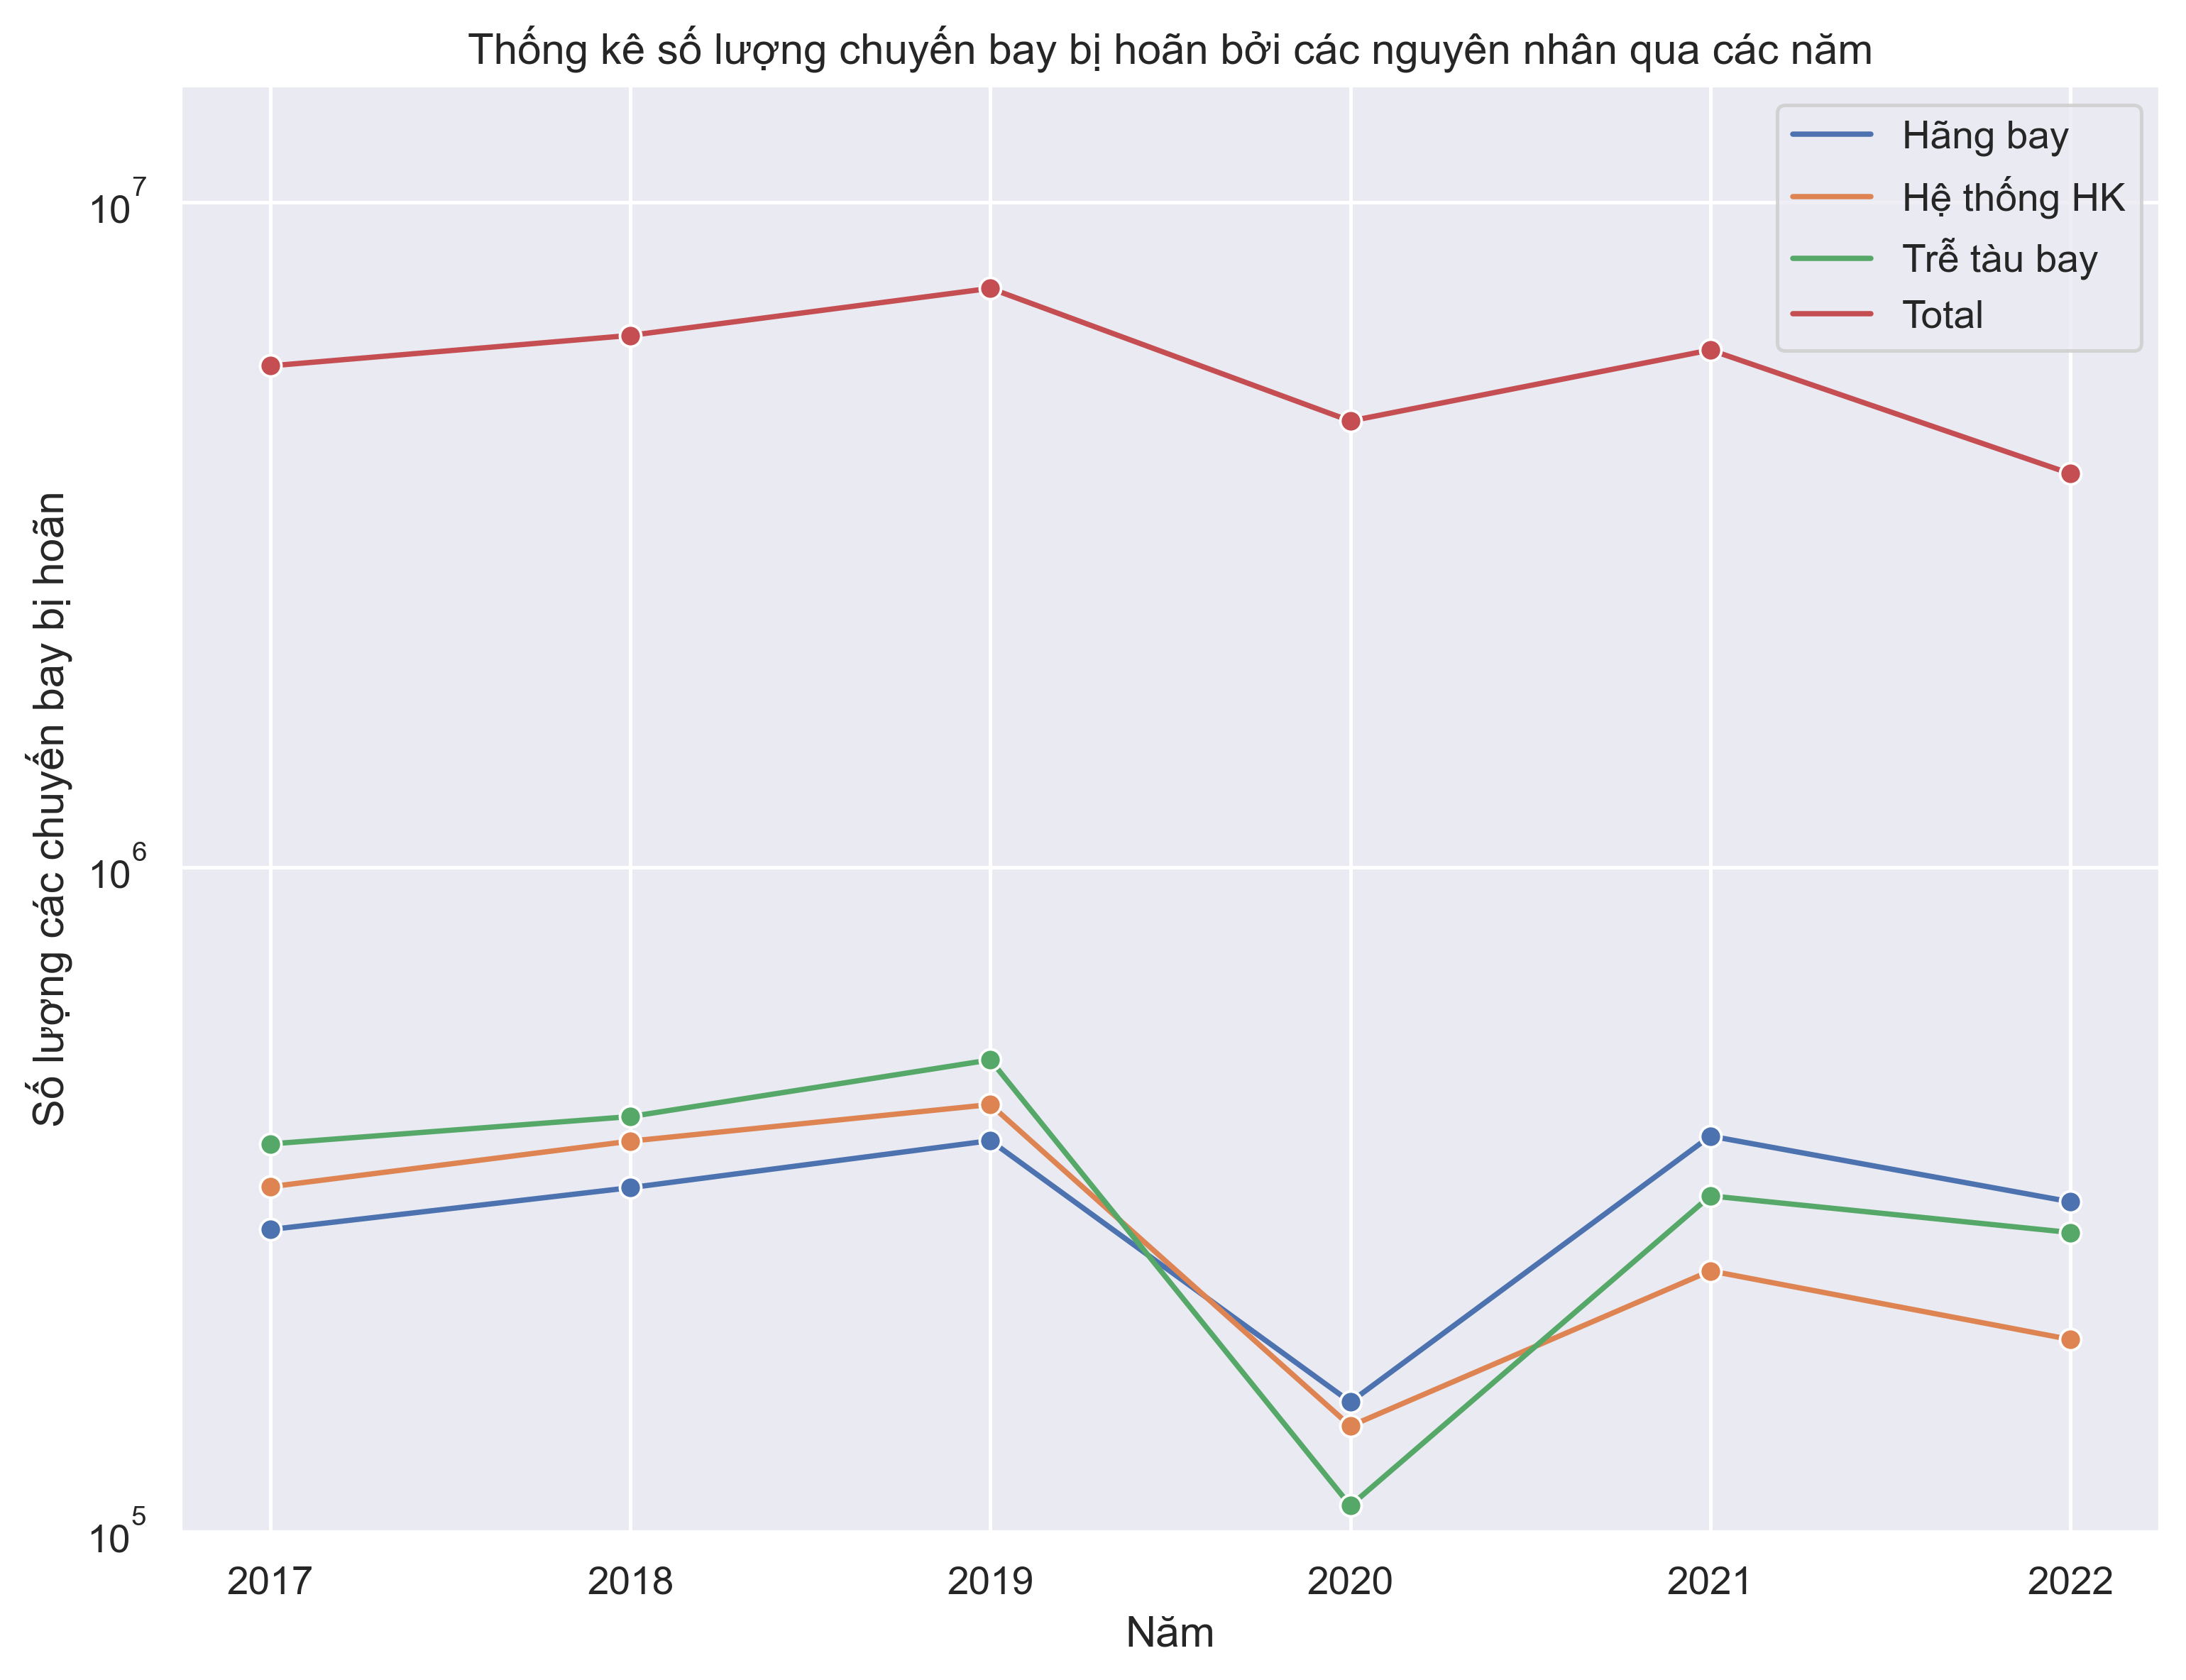

In [167]:
fig,ax = plt.subplots(figsize = (10,7.5))
g = sns.lineplot(x='year', y ='value', hue='variable', marker='o',
             data=pd.melt(top3_delay, ['year']));
#sns.lineplot(data = total, x = 'year', y = total.values, marker = 'o')
plt.xlabel('Năm')
plt.ylabel('Số lượng các chuyến bay bị hoãn')
plt.title('Thống kê số lượng chuyến bay bị hoãn bởi các nguyên nhân qua các năm')
plt.legend();
#plt.ticklabel_format(style = 'plain')
plt.ylim(100000,15000000)
plt.yscale('symlog')

<h3 style=" background-color:#f7f2d5; font-family:sans-serif; line-height: 2em; font-size: 20px;">📝 Nhận xét:</h3>

- Số lượng các chuyến bay bị hoãn với 3 nguyên nhân cốt yếu có sự biến động thất thường từ 2017 - 2022.

- Tăng mạnh từ 2017 - 2019, cuộc sống ngày càng hiện đại nên nhu cầu di chuyển bằng đường hàng không vừa an toàn và nhanh chóng tăng nhanh cho nên các chuyến bay bị hoãn cũng hiển nhiên tăng cao. Số lượng chuyến bay bị hoãn vì ba nguyên nhân tăng đều trong đó số lượng bị hoãn vì một chuyến khác trên cùng một máy bay cũng bị hoãn là cao nhất, ngược lại nguyên nhân vì hãng hàng không thì thấp nhất.

- Giảm mạnh vào năm 2020, đây là thời điểm thế giới có nhiều biến động đặt biệt là covid-19 chính vì vậy việc di chuyển bằng đường hàng không bị hạn chế dẫn đến các chuyến bay bị hoãn lại cũng theo đó không nhiều. Trong đó số lượng bị hoãn do một chuyến khác trên cùng một máy bay bị hoãn đột ngột giảm mạnh xuống mức thấp nhất trong 3 nguyên nhân, còn nguyên nhân vì hãng hàng không có giảm nhưng lại là nguyên nhân chủ yếu gây nên việc hoãn chuyến bay trong năm 2020.

- Tăng nhanh vào năm 2021, các chuyến bay đã được tăng lên song song với đó là việc các chuyến bay trì hoãn cũng tăng lên lúc này nguyên nhân chủ yếu dẫn đến hoãn các chuyến bay vẫn là do từ hãng hàng không, tiếp đến là vì có một chuyến khác trên cùng máy bay bị hoãn và cuối cùng là hệ thống hàng không quốc gia.

- Đến năm 2022 số lượng chuyến bay thấp bởi vì đây mới chỉ là thống kê tới tháng 7/2022 nên ta vẫn chưa thể có những khẳng định chính xác, tuy vậy nếu chỉ tính tới tháng 7 thì số chuyến bay bị hoãn lại có nguyên nhân lớn vẫn đến từ hãng hàng không và thấp hơn đối với hai nguyên nhân còn lại.

- Ta thấy rằng trong những năm gần đây số lượng các chuyến bay bị hoãn do hãng hàng không là chủ yếu, chính vì vậy các hãng hàng không cần chú ý hơn và có những biện pháp phù hợp để cải thiện tình trạng này và nâng cao chất lượng dịch vụ hàng không.

<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 5</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Những thành phố nào có nhiều hãng bay hoạt động nhất? Những thành phố nào có nhiều hãng bay hoạt động trung bình? Những thành phố nào có ít hãng bay hoạt động nhất? </div>
<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">
    Tình hình chuyến bay ở những thành phố đó được phân bố như thế nào?
</div>
</br>
<div  style="font-family:sans-serif;">📍 Trả lời được sẽ góp phần hiểu rõ các thành phố nào đang có tình hình bất ổn nhất và cần đẩy mạnh và phát triển công tác quản lý các chuyến bay.</div>


<div  style="font-family:sans-serif;">⚙ Sử dụng một dataframe được copy tên data_5 để trả lời câu hỏi, tránh việc bị rối khi trả lời các câu hỏi khác. <div>


In [168]:
data_5=copy.deepcopy(df)

<div  style="font-family:sans-serif;">⚙ Để trả lời câu hỏi đưa ra, ta cần biết địa chỉ các sân bay hoạt động của hãng hàng không. Các bạn có thể để ý thấy ở cột airport_name có đề cập đến tên thành phố ở trước dấu phẩy. Vì thế, ta tiến hành xử lý cột airport_name để lấy địa chỉ sân bay và thêm dữ liệu đó vào cột address tạo mới.<div>


In [169]:
airport_addr=data_5[['airport','airport_name']]
airport_addr['airport_name']=airport_addr['airport_name'].str.split(',').str[0]
data_5.insert(3,'city',airport_addr['airport_name'])
data_5.head(5)

,year,month,carrier,city,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Allentown/Bethlehem/Easton,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Albany,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Nantucket,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Alexandria,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Augusta,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


<div  style="font-family:sans-serif;">⚙ Mỗi thành phố đều có nhiều hãng bay khác nhau hoạt động ở đó. Bây giờ, chúng ta sẽ tiến hành xác định mỗi thành phố có bao nhiêu hãng bay khác nhau hoạt động. Kết quả sẽ được lưu vào dataframe sum_carrier_addr.<div>


In [170]:
sum_carrier_addr=data_5.groupby(['city'])['carrier'].nunique()
sum_carrier_addr=pd.DataFrame(sum_carrier_addr).reset_index()
sum_carrier_addr=sum_carrier_addr.sort_values('carrier',ascending=False)
sum_carrier_addr=sum_carrier_addr.reset_index().drop(columns=['index'])

<div  style="font-family:sans-serif;">⚙ Câu hỏi đã yêu cầu tìm các thành phố có số lượng hãng bay hoạt động nhiều, trung bình và ít. Thế thì giờ, ta thực hiện thôi. Kết quả sẽ được lưu vào lần lượt 3 dataframe list_top_addr, list_mid_addr, list_bot_addr.<div>


In [171]:
top_5=sum_carrier_addr[0:10]['city']
mid_5=sum_carrier_addr[175:185]['city']
bot_5=sum_carrier_addr[-10:]['city']
list_top_addr=[]
list_mid_addr=[]
list_bot_addr=[]

for i in top_5:
    temp=data_5.loc[data_5['city']==i]
    sum_flights=temp['arr_flights'].sum()
    
    sum_arr_del15=temp['arr_del15'].sum()
    sum_arr_cancelled=temp['arr_cancelled'].sum()
    sum_arr_diverted=temp['arr_diverted'].sum()
    sum_fine_flights=sum_flights-sum_arr_del15-sum_arr_cancelled-sum_arr_diverted
    
    rate_fine_flights=sum_fine_flights/sum_flights*100
    rate_arr_del15=sum_arr_del15/sum_flights*100
    rate_arr_cancelled=sum_arr_cancelled/sum_flights*100
    rate_arr_diverted=sum_arr_diverted/sum_flights*100
    
    list_top_addr.append([i,rate_fine_flights,rate_arr_del15,rate_arr_cancelled,rate_arr_diverted])


for i in mid_5:
    temp=data_5.loc[data_5['city']==i]
    sum_flights=temp['arr_flights'].sum()
    
    sum_arr_del15=temp['arr_del15'].sum()
    sum_arr_cancelled=temp['arr_cancelled'].sum()
    sum_arr_diverted=temp['arr_diverted'].sum()
    sum_fine_flights=sum_flights-sum_arr_del15-sum_arr_cancelled-sum_arr_diverted
    
    rate_fine_flights=sum_fine_flights/sum_flights*100
    rate_arr_del15=sum_arr_del15/sum_flights*100
    rate_arr_cancelled=sum_arr_cancelled/sum_flights*100
    rate_arr_diverted=sum_arr_diverted/sum_flights*100
    
    list_mid_addr.append([i,rate_fine_flights,rate_arr_del15,rate_arr_cancelled,rate_arr_diverted])
    
for i in bot_5:
    temp=data_5.loc[data_5['city']==i]
    sum_flights=temp['arr_flights'].sum()
    
    sum_arr_del15=temp['arr_del15'].sum()
    sum_arr_cancelled=temp['arr_cancelled'].sum()
    sum_arr_diverted=temp['arr_diverted'].sum()
    sum_fine_flights=sum_flights-sum_arr_del15-sum_arr_cancelled-sum_arr_diverted
    color=palette_color[2]
    rate_fine_flights=sum_fine_flights/sum_flights*100
    rate_arr_del15=sum_arr_del15/sum_flights*100
    rate_arr_cancelled=sum_arr_cancelled/sum_flights*100
    rate_arr_diverted=sum_arr_diverted/sum_flights*100
    
    list_bot_addr.append([i,rate_fine_flights,rate_arr_del15,rate_arr_cancelled,rate_arr_diverted])

list_top_addr=pd.DataFrame(list_top_addr)
print('Những thành phố có số lượng hãng bay hoạt động nhiều nhất:')
display(list_top_addr)
list_mid_addr=pd.DataFrame(list_mid_addr)
print('\n\nNhững thành phố có số lượng hãng bay hoạt động trung bình:')
display(list_mid_addr)
list_bot_addr=pd.DataFrame(list_bot_addr)
print('\n\nNhững thành phố có số lượng hãng bay hoạt động ít nhất:')
display(list_bot_addr)


Những thành phố có số lượng hãng bay hoạt động nhiều nhất:


,0,1,2,3,4
0,Austin,79.356040,18.269959,2.155343,0.218658
1,Portland,81.843984,16.346346,1.680784,0.128886
2,Chicago,79.411117,17.296403,3.024271,0.268209
3,Boston,76.330614,20.729517,2.822067,0.117801
4,Nashville,80.501511,16.890126,2.464129,0.144234
5,New York,75.287313,20.937742,3.367757,0.407187
6,Kansas City,80.365541,17.001417,2.434124,0.198918
7,Minneapolis,85.149469,13.213044,1.478186,0.159301
8,Baltimore,81.385516,15.414706,3.007357,0.192422
9,Raleigh/Durham,79.373667,17.982274,2.499456,0.144603




Những thành phố có số lượng hãng bay hoạt động trung bình:


,0,1,2,3,4
0,Alexandria,83.149962,14.182366,2.253203,0.414469
1,Gunnison,77.733912,17.607580,3.829451,0.829056
2,Bellingham,82.121538,13.895685,3.698992,0.283785
3,Bend/Redmond,82.863254,14.892691,1.943155,0.300899
4,Brownsville,82.513829,14.177423,2.960459,0.348289
5,College Station/Bryan,83.367721,13.101788,3.312701,0.217790
6,Santa Rosa,81.429229,15.342739,2.798651,0.429382
7,Elmira/Corning,82.746396,13.637438,3.167100,0.449066
8,Newburgh/Poughkeepsie,73.148591,23.650263,2.962255,0.238892
9,Toledo,78.662646,17.488471,3.565094,0.283789




Những thành phố có số lượng hãng bay hoạt động ít nhất:


,0,1,2,3,4
0,Kearney,79.718404,16.325846,3.251760,0.703989
1,Kodiak,83.229814,11.827122,4.761905,0.181159
2,Kotzebue,85.722269,9.891031,3.408773,0.977927
3,Latrobe,79.624329,17.316637,2.772809,0.286225
4,Lewisburg,77.425044,18.871252,3.280423,0.423280
5,Lewiston,91.281139,7.495552,0.578292,0.645018
6,Liberal,82.158430,14.316860,3.052326,0.472384
7,Mammoth Lakes,58.699634,20.146520,20.329670,0.824176
8,Mason City,82.036613,12.471396,4.919908,0.572082
9,Laramie,80.052265,15.389082,4.094077,0.464576


<div  style="font-family:sans-serif;">⚙ Yêu cầu tiếp theo là tìm hiểu tình hình của các thành phố vừa tìm được. Vậy nên, ta sẽ đi tính tỉ lệ (%) các chuyến bay đúng lịch, hoãn, huỷ, chuyển hướng để phân tích kỹ hơn hoạt động các hãng bay tại đây.<div>


In [172]:
list_top_addr.columns = ['Thành phố', 'Tỉ lệ chuyến bay đúng theo lịch',
                     'Tỉ lệ chuyến bay hoãn', 'Tỉ lệ chuyến bay huỷ','Tỉ lệ chuyến bay chuyển hướng']
print('Tỉ lệ các chuyến bay ở thành phố có nhiều hãng bay hoạt động nhất:')
display(list_top_addr)

list_mid_addr.columns = ['Thành phố', 'Tỉ lệ chuyến bay đúng theo lịch',
                     'Tỉ lệ chuyến bay hoãn', 'Tỉ lệ chuyến bay huỷ','Tỉ lệ chuyến bay chuyển hướng']
print('\n\nTỉ lệ các chuyến bay ở thành phố có nhiều hãng bay hoạt động trung bình:')
display(list_mid_addr)

list_bot_addr.columns = ['Thành phố', 'Tỉ lệ chuyến bay đúng theo lịch',
                     'Tỉ lệ chuyến bay hoãn', 'Tỉ lệ chuyến bay huỷ','Tỉ lệ chuyến bay chuyển hướng']
print('\n\nTỉ lệ các chuyến bay ở thành phố có ít hãng bay hoạt động nhất:')
display(list_bot_addr)

Tỉ lệ các chuyến bay ở thành phố có nhiều hãng bay hoạt động nhất:


,Thành phố,Tỉ lệ chuyến bay đúng theo lịch,Tỉ lệ chuyến bay hoãn,Tỉ lệ chuyến bay huỷ,Tỉ lệ chuyến bay chuyển hướng
0,Austin,79.356040,18.269959,2.155343,0.218658
1,Portland,81.843984,16.346346,1.680784,0.128886
2,Chicago,79.411117,17.296403,3.024271,0.268209
3,Boston,76.330614,20.729517,2.822067,0.117801
4,Nashville,80.501511,16.890126,2.464129,0.144234
5,New York,75.287313,20.937742,3.367757,0.407187
6,Kansas City,80.365541,17.001417,2.434124,0.198918
7,Minneapolis,85.149469,13.213044,1.478186,0.159301
8,Baltimore,81.385516,15.414706,3.007357,0.192422
9,Raleigh/Durham,79.373667,17.982274,2.499456,0.144603




Tỉ lệ các chuyến bay ở thành phố có nhiều hãng bay hoạt động trung bình:


,Thành phố,Tỉ lệ chuyến bay đúng theo lịch,Tỉ lệ chuyến bay hoãn,Tỉ lệ chuyến bay huỷ,Tỉ lệ chuyến bay chuyển hướng
0,Alexandria,83.149962,14.182366,2.253203,0.414469
1,Gunnison,77.733912,17.607580,3.829451,0.829056
2,Bellingham,82.121538,13.895685,3.698992,0.283785
3,Bend/Redmond,82.863254,14.892691,1.943155,0.300899
4,Brownsville,82.513829,14.177423,2.960459,0.348289
5,College Station/Bryan,83.367721,13.101788,3.312701,0.217790
6,Santa Rosa,81.429229,15.342739,2.798651,0.429382
7,Elmira/Corning,82.746396,13.637438,3.167100,0.449066
8,Newburgh/Poughkeepsie,73.148591,23.650263,2.962255,0.238892
9,Toledo,78.662646,17.488471,3.565094,0.283789




Tỉ lệ các chuyến bay ở thành phố có ít hãng bay hoạt động nhất:


,Thành phố,Tỉ lệ chuyến bay đúng theo lịch,Tỉ lệ chuyến bay hoãn,Tỉ lệ chuyến bay huỷ,Tỉ lệ chuyến bay chuyển hướng
0,Kearney,79.718404,16.325846,3.251760,0.703989
1,Kodiak,83.229814,11.827122,4.761905,0.181159
2,Kotzebue,85.722269,9.891031,3.408773,0.977927
3,Latrobe,79.624329,17.316637,2.772809,0.286225
4,Lewisburg,77.425044,18.871252,3.280423,0.423280
5,Lewiston,91.281139,7.495552,0.578292,0.645018
6,Liberal,82.158430,14.316860,3.052326,0.472384
7,Mammoth Lakes,58.699634,20.146520,20.329670,0.824176
8,Mason City,82.036613,12.471396,4.919908,0.572082
9,Laramie,80.052265,15.389082,4.094077,0.464576


### Vẽ biểu đồ minh hoạ

<h5 style="font-family:sans-serif;font-size:25">⚙ Tiền xử lý<h5>

In [173]:
list_top_addr=list_top_addr.set_index('Thành phố')
list_bot_addr=list_bot_addr.set_index('Thành phố')
list_mid_addr=list_mid_addr.set_index('Thành phố')

<h5 style="font-family:sans-serif;font-size:25">⚙ Code vẽ biểu đồ<h5>

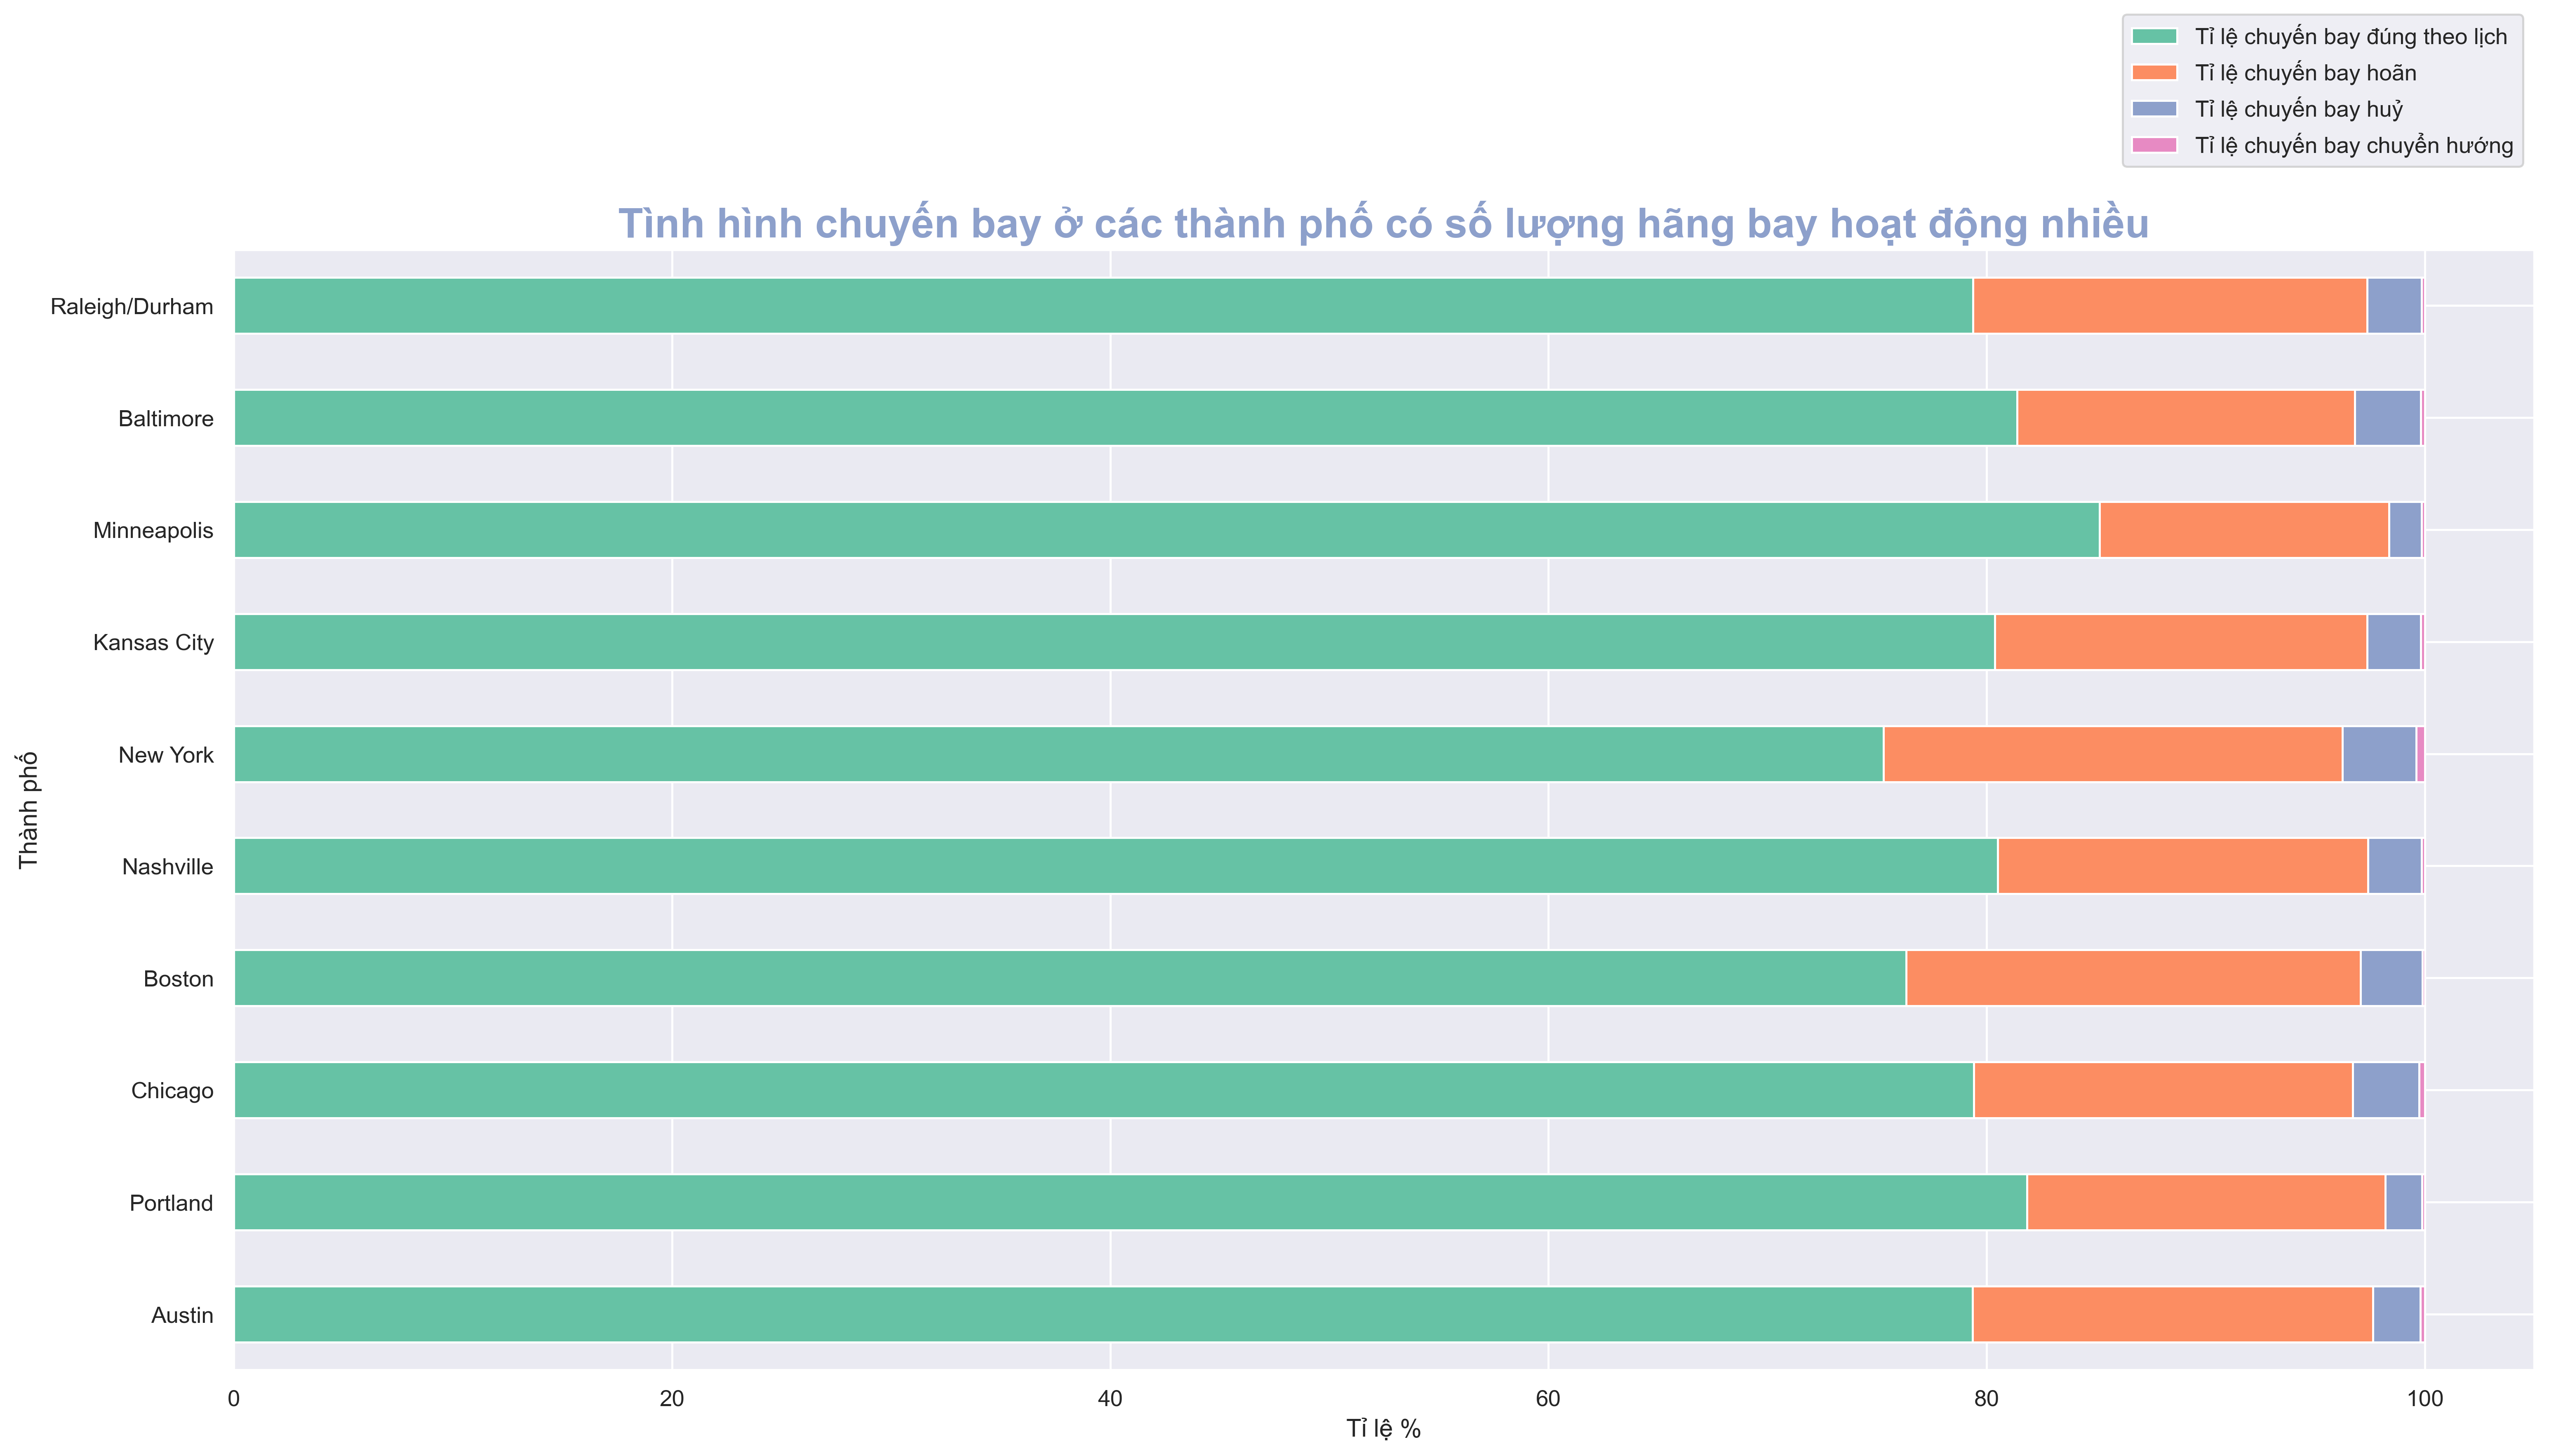

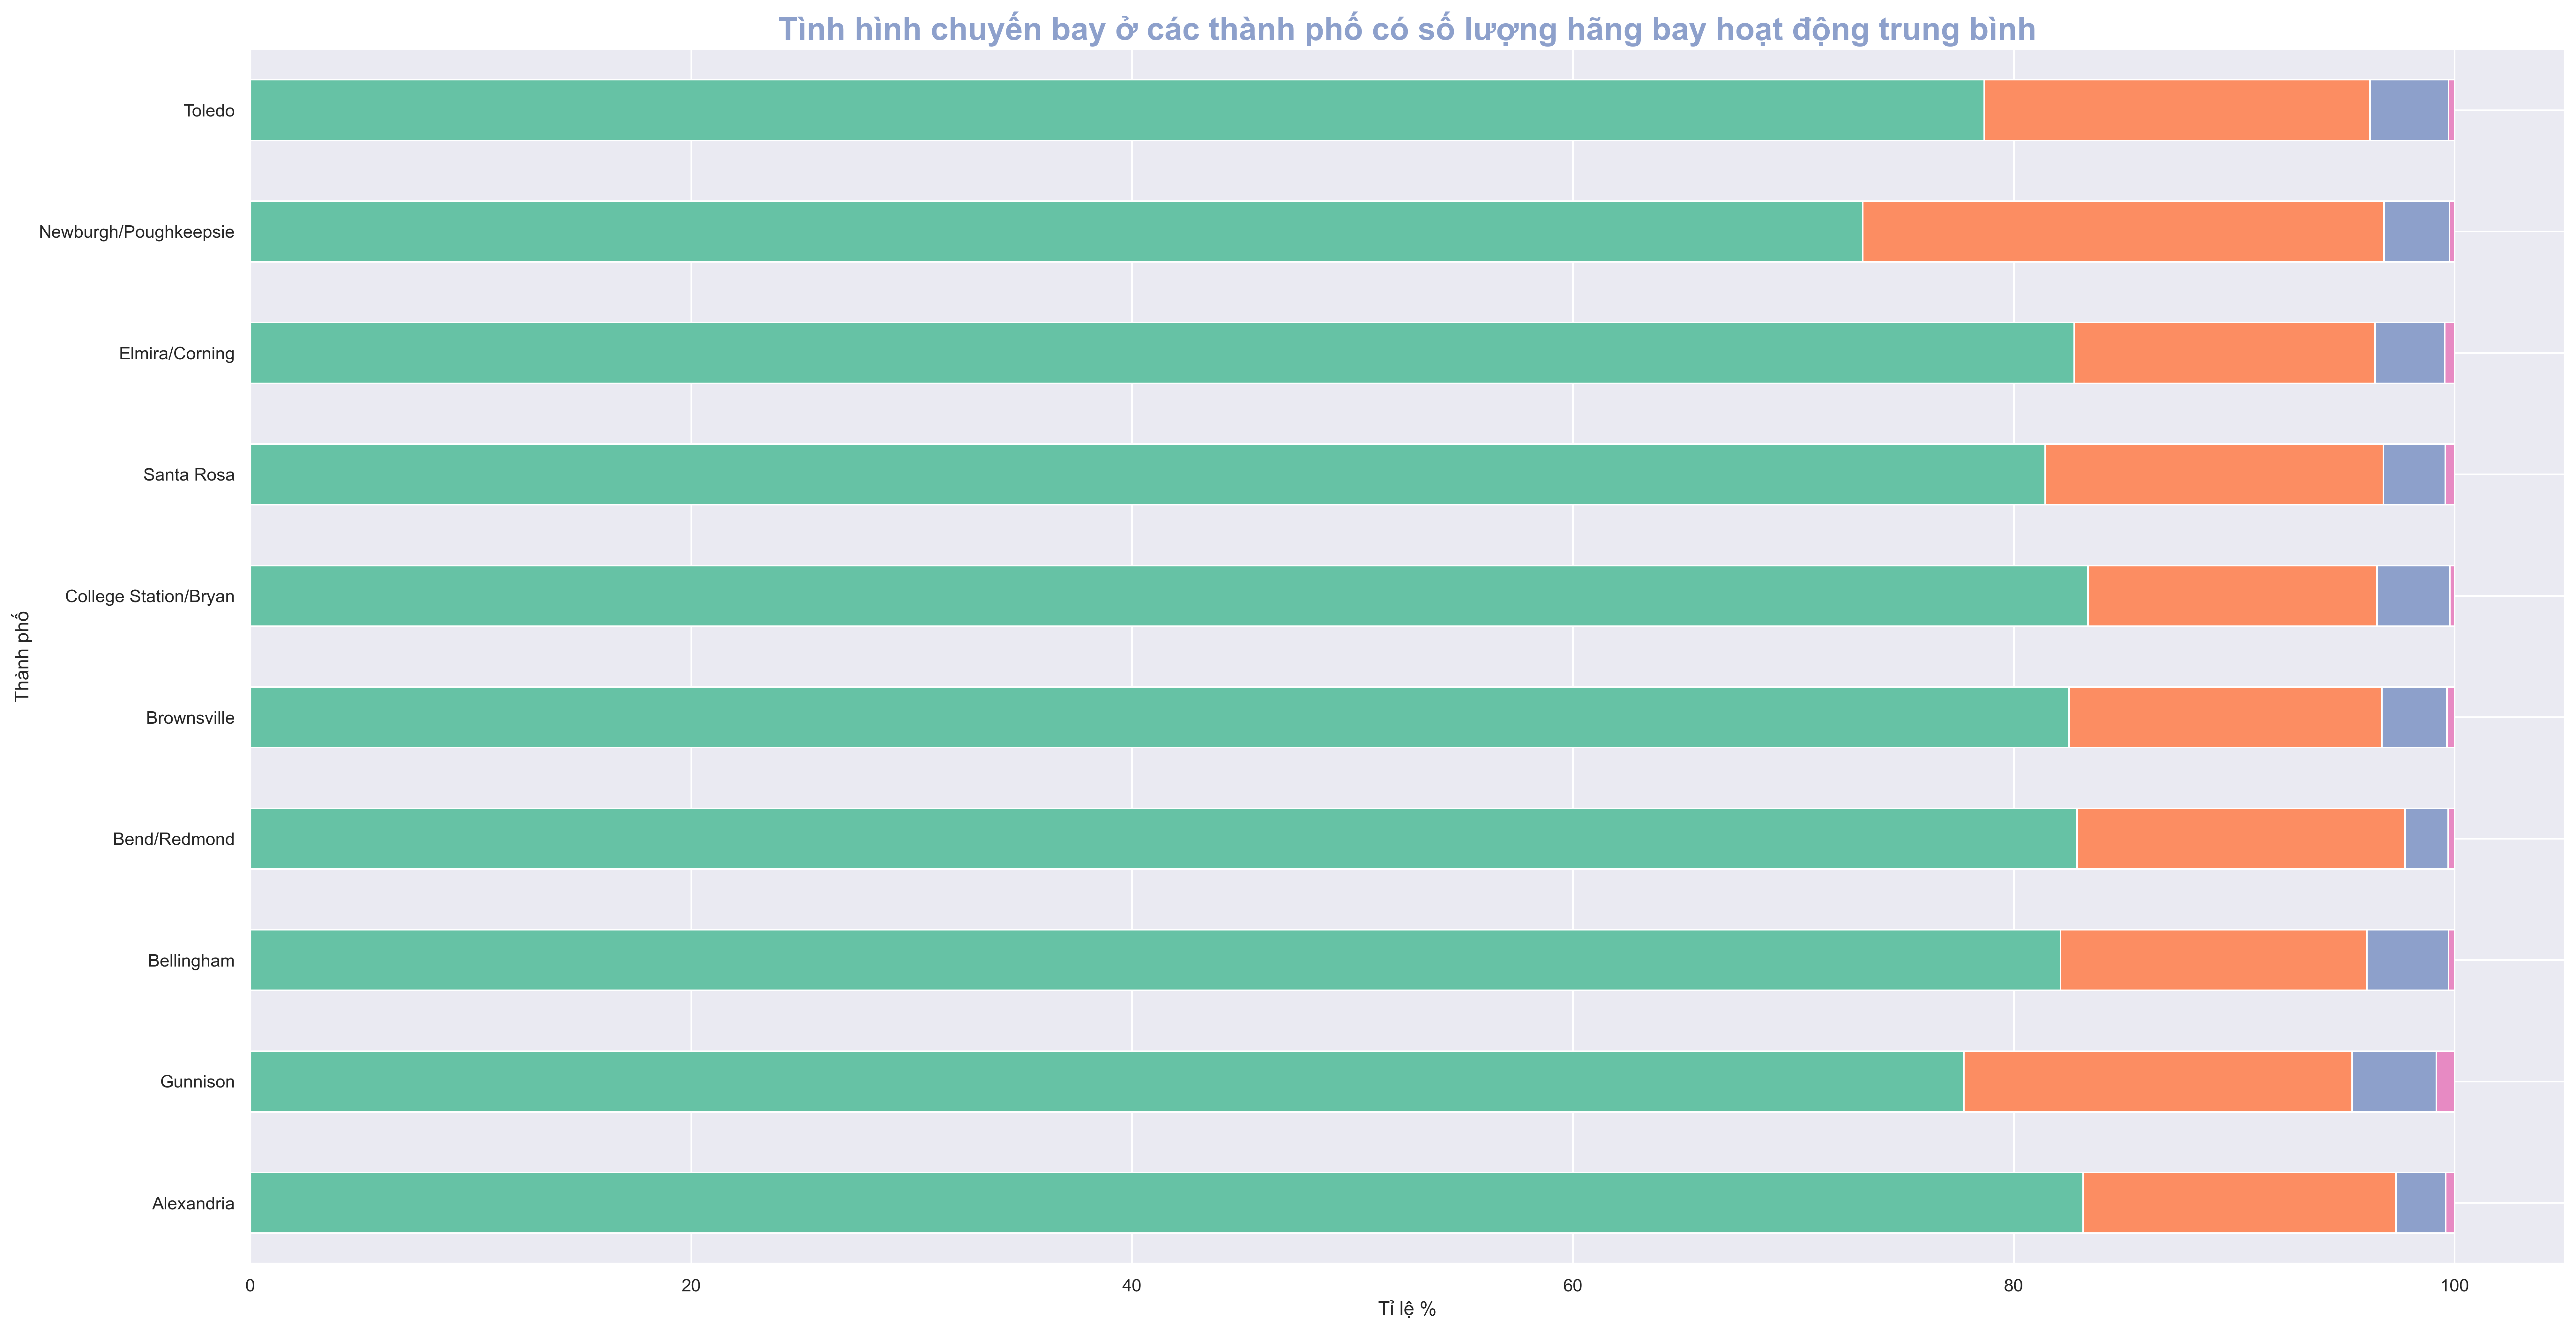

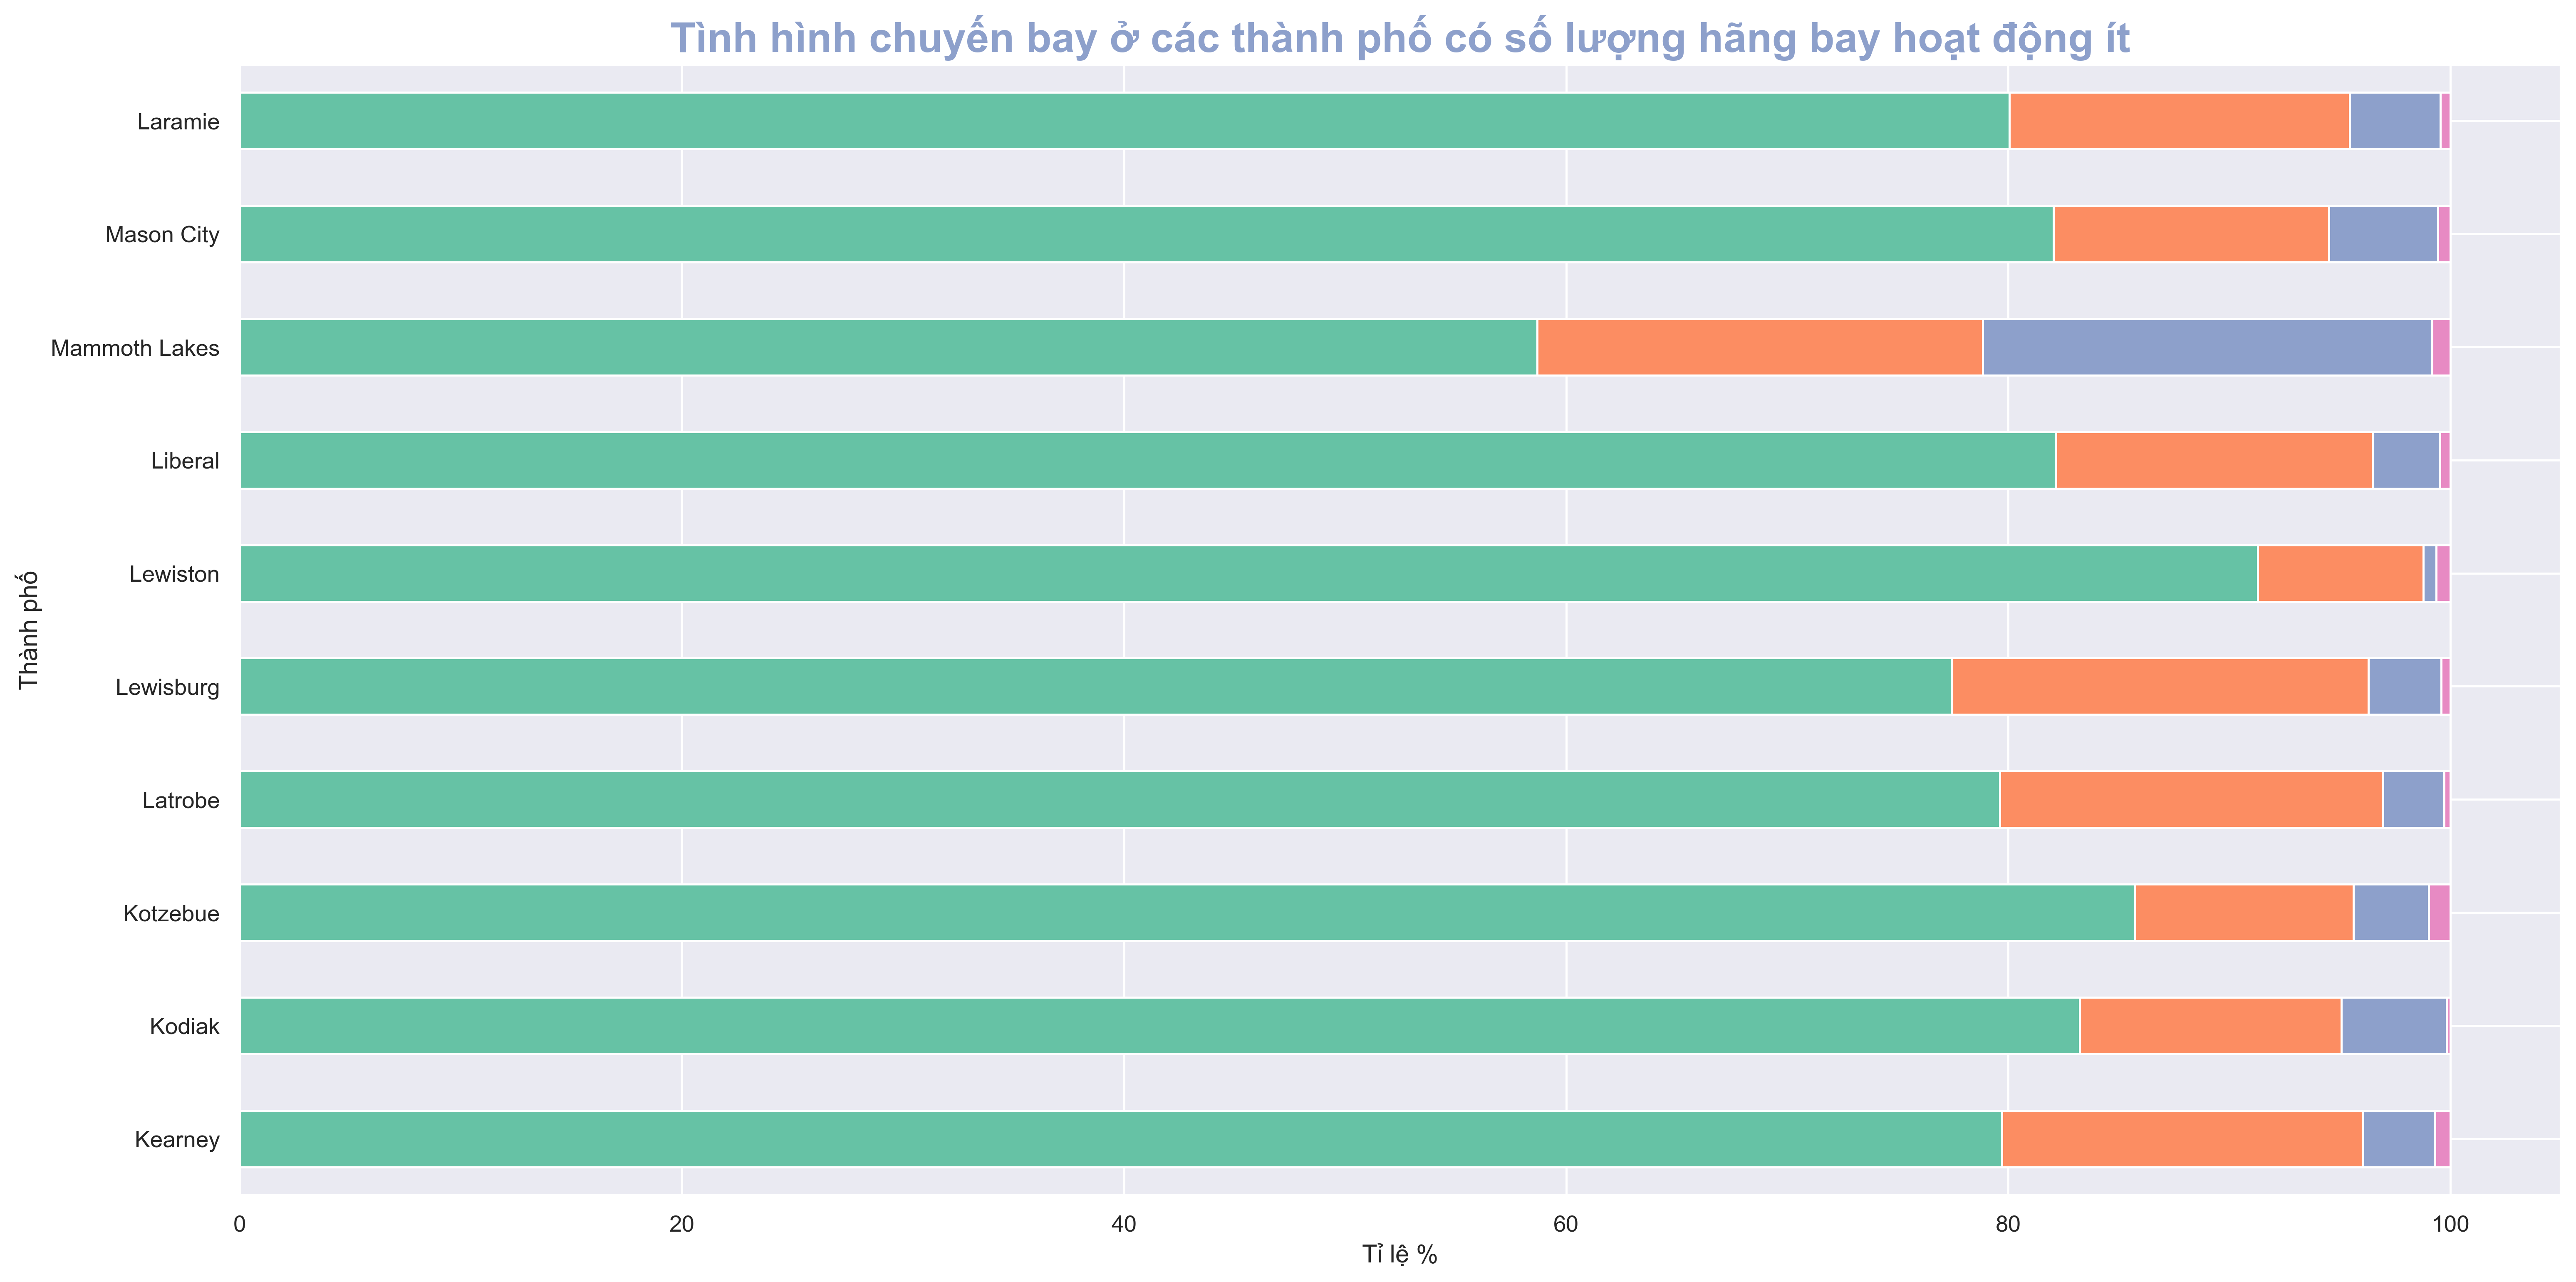

In [174]:
plt.rcParams['figure.dpi'] = 360
palette_color = sns.color_palette("Set2")

top_dx = list_top_addr.plot.barh(figsize =(20, 10),stacked=True,color=palette_color)
top_dx.set_title('Tình hình chuyến bay ở các thành phố có số lượng hãng bay hoạt động nhiều',
            fontsize=20,fontweight='bold',color=palette_color[2])
top_dx.set_xlabel('Tỉ lệ %')

mid_dx = list_mid_addr.plot.barh(figsize =(26, 14),stacked=True,color=palette_color)
mid_dx.set_title('Tình hình chuyến bay ở các thành phố có số lượng hãng bay hoạt động trung bình',
            fontsize=20,fontweight='bold',color=palette_color[2])
mid_dx.set_xlabel('Tỉ lệ %')

bot_dx = list_bot_addr.plot.barh(figsize =(20, 10),stacked=True,color=palette_color)
bot_dx.set_title('Tình hình chuyến bay ở các thành phố có số lượng hãng bay hoạt động ít',
            fontsize=20,fontweight='bold',color=palette_color[2])
bot_dx.set_xlabel('Tỉ lệ %')

top_dx.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 1.22))
mid_dx.legend().remove()
bot_dx.legend().remove()
plt.show()

***Trả lời câu hỏi:***

- Ở các thành phố có nhiều hãng bay hoạt động:
    + Chỉ có 5 trên 10 thành phố có tỉ lệ chuyến bay đúng lịch trình trên 80%.
    + Có 2 trên 10 thành phố có tỉ lệ trễ chuyến hơn 20%, các thành phố còn lại có tỉ lệ trễ trải từ 15 - 20%.
    + Tỉ lệ huỷ và chuyển hướng không đáng kể, chỉ chiếm từ 2 - 4% tổng thể.
    
    
- Ở các thành phố có số lượng hãng bay hoạt động trung bình:
    + Có tới 7 trên 10 thành phố có tỉ lệ chuyến bay đúng lịch trình trên 80%.
    + Tỉ lệ trễ chuyến hầu như thấp hơn 20%, ngoại trừ Newburgh/Poughkeepsie.
    + Tỉ lệ huỷ và chuyến hướng nhiều và phân bố đều hơn ở thành phố có nhiều hãng bay hoạt động.
    
    
- Ở các thành phố có nhiều hãng bay hoạt động:
    + Có 6 trên 10 thành phố có tỉ lệ chuyến bay đúng lịch trình trên 80%, nhưng tỉ lệ phân bố trải không đều như ở 2 loại thành phố trên.
    + Chỉ có 1 trên 10 thành phố có tỉ lệ trễ chuyến khoảng 20%, các thành phố còn lại đều thấp hơn 20%.
    + Tỉ lệ huỷ và chuyển hướng hầu như nhiều hơn 2 loại thành phố trên nhưng lại bất ổn định nhất trong 3 loại thành phố.
    
    
> Như vậy, ta thấy được, ở các thành phố có nhiều hãng bay hoạt động hay gặp vấn đề trễ chuyến và ít đúng lịch trình nhất, nhưng lại là nơi ổn định tình hình nhất trong cả 3 loại thành phố. Còn ở các thành phố có số lượng hãng bay trung bình thì có tỉ lệ trễ chuyến ít nhất và đúng lịch trình nhất trong cả 3, nhưng lại có sự gia tăng tỉ lệ huỷ và chuyển hướng so với thành phố có nhiều hãng bay hoạt động nhất. Cuối cùng, ở các thành phố có ít hãng bay hoạt động nhất thì tình hình bất ổn định nhất, các tỉ lệ trễ, huỷ, chuyển hướng phân bố không đều nhất trong cả 3.

<div>Trên đây là phần trả lời các câu hỏi dựa trên bộ dữ liệu Các chuyến bay bị đổi lịch trình. Nhìn chung tình hình các chuyến bay ở Mỹ có nhiều biến động trong 5 năm gần đây.</div>
<h1 style="text-align: center; background-color:#E9F7EF; font-family:Arial; color:#526085;line-height: 2em";font-size: 50px;>HẾT</h1>